Looking at whether all-vs-all overlaps returns more overlaps for a read compared to half-vs-half

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [2]:
with open("../tmp/longest.ids") as f:
    longest = set([line.strip() for line in f])

with open("../tmp/overlap.ids") as f:
    overlap = set([line.strip() for line in f])

assert len(longest) == len(overlap)

In [35]:
read_overlaps = {"hvh": Counter(), "ava": Counter()}
pair_counts = {"hvh": Counter(), "ava": Counter()}

In [36]:
with open("../tmp/AMtb_1.ava.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        qname = fields[0]
        tname = fields[5]

        if qname in longest and tname in longest:
            continue
        elif qname in overlap and tname in overlap:
            continue

        pair = tuple(sorted([qname, tname]))
        read_overlaps["ava"][qname] += 1
        read_overlaps["ava"][tname] += 1
        pair_counts["ava"][pair] += 1

In [37]:
with open("../tmp/AMtb_1.hvh.dual.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        qname = fields[0]
        tname = fields[5]
        pair = tuple(sorted([qname, tname]))
        read_overlaps["hvh"][qname] += 1
        read_overlaps["hvh"][tname] += 1
        pair_counts["hvh"][pair] += 1

In [38]:
print(f'{sum(read_overlaps["ava"].values())} overlaps in ava')
print(f'{sum(read_overlaps["hvh"].values())} overlaps in hvh')
2651942/1349422

2651942 overlaps in ava
2684050 overlaps in hvh


1.965242896588317

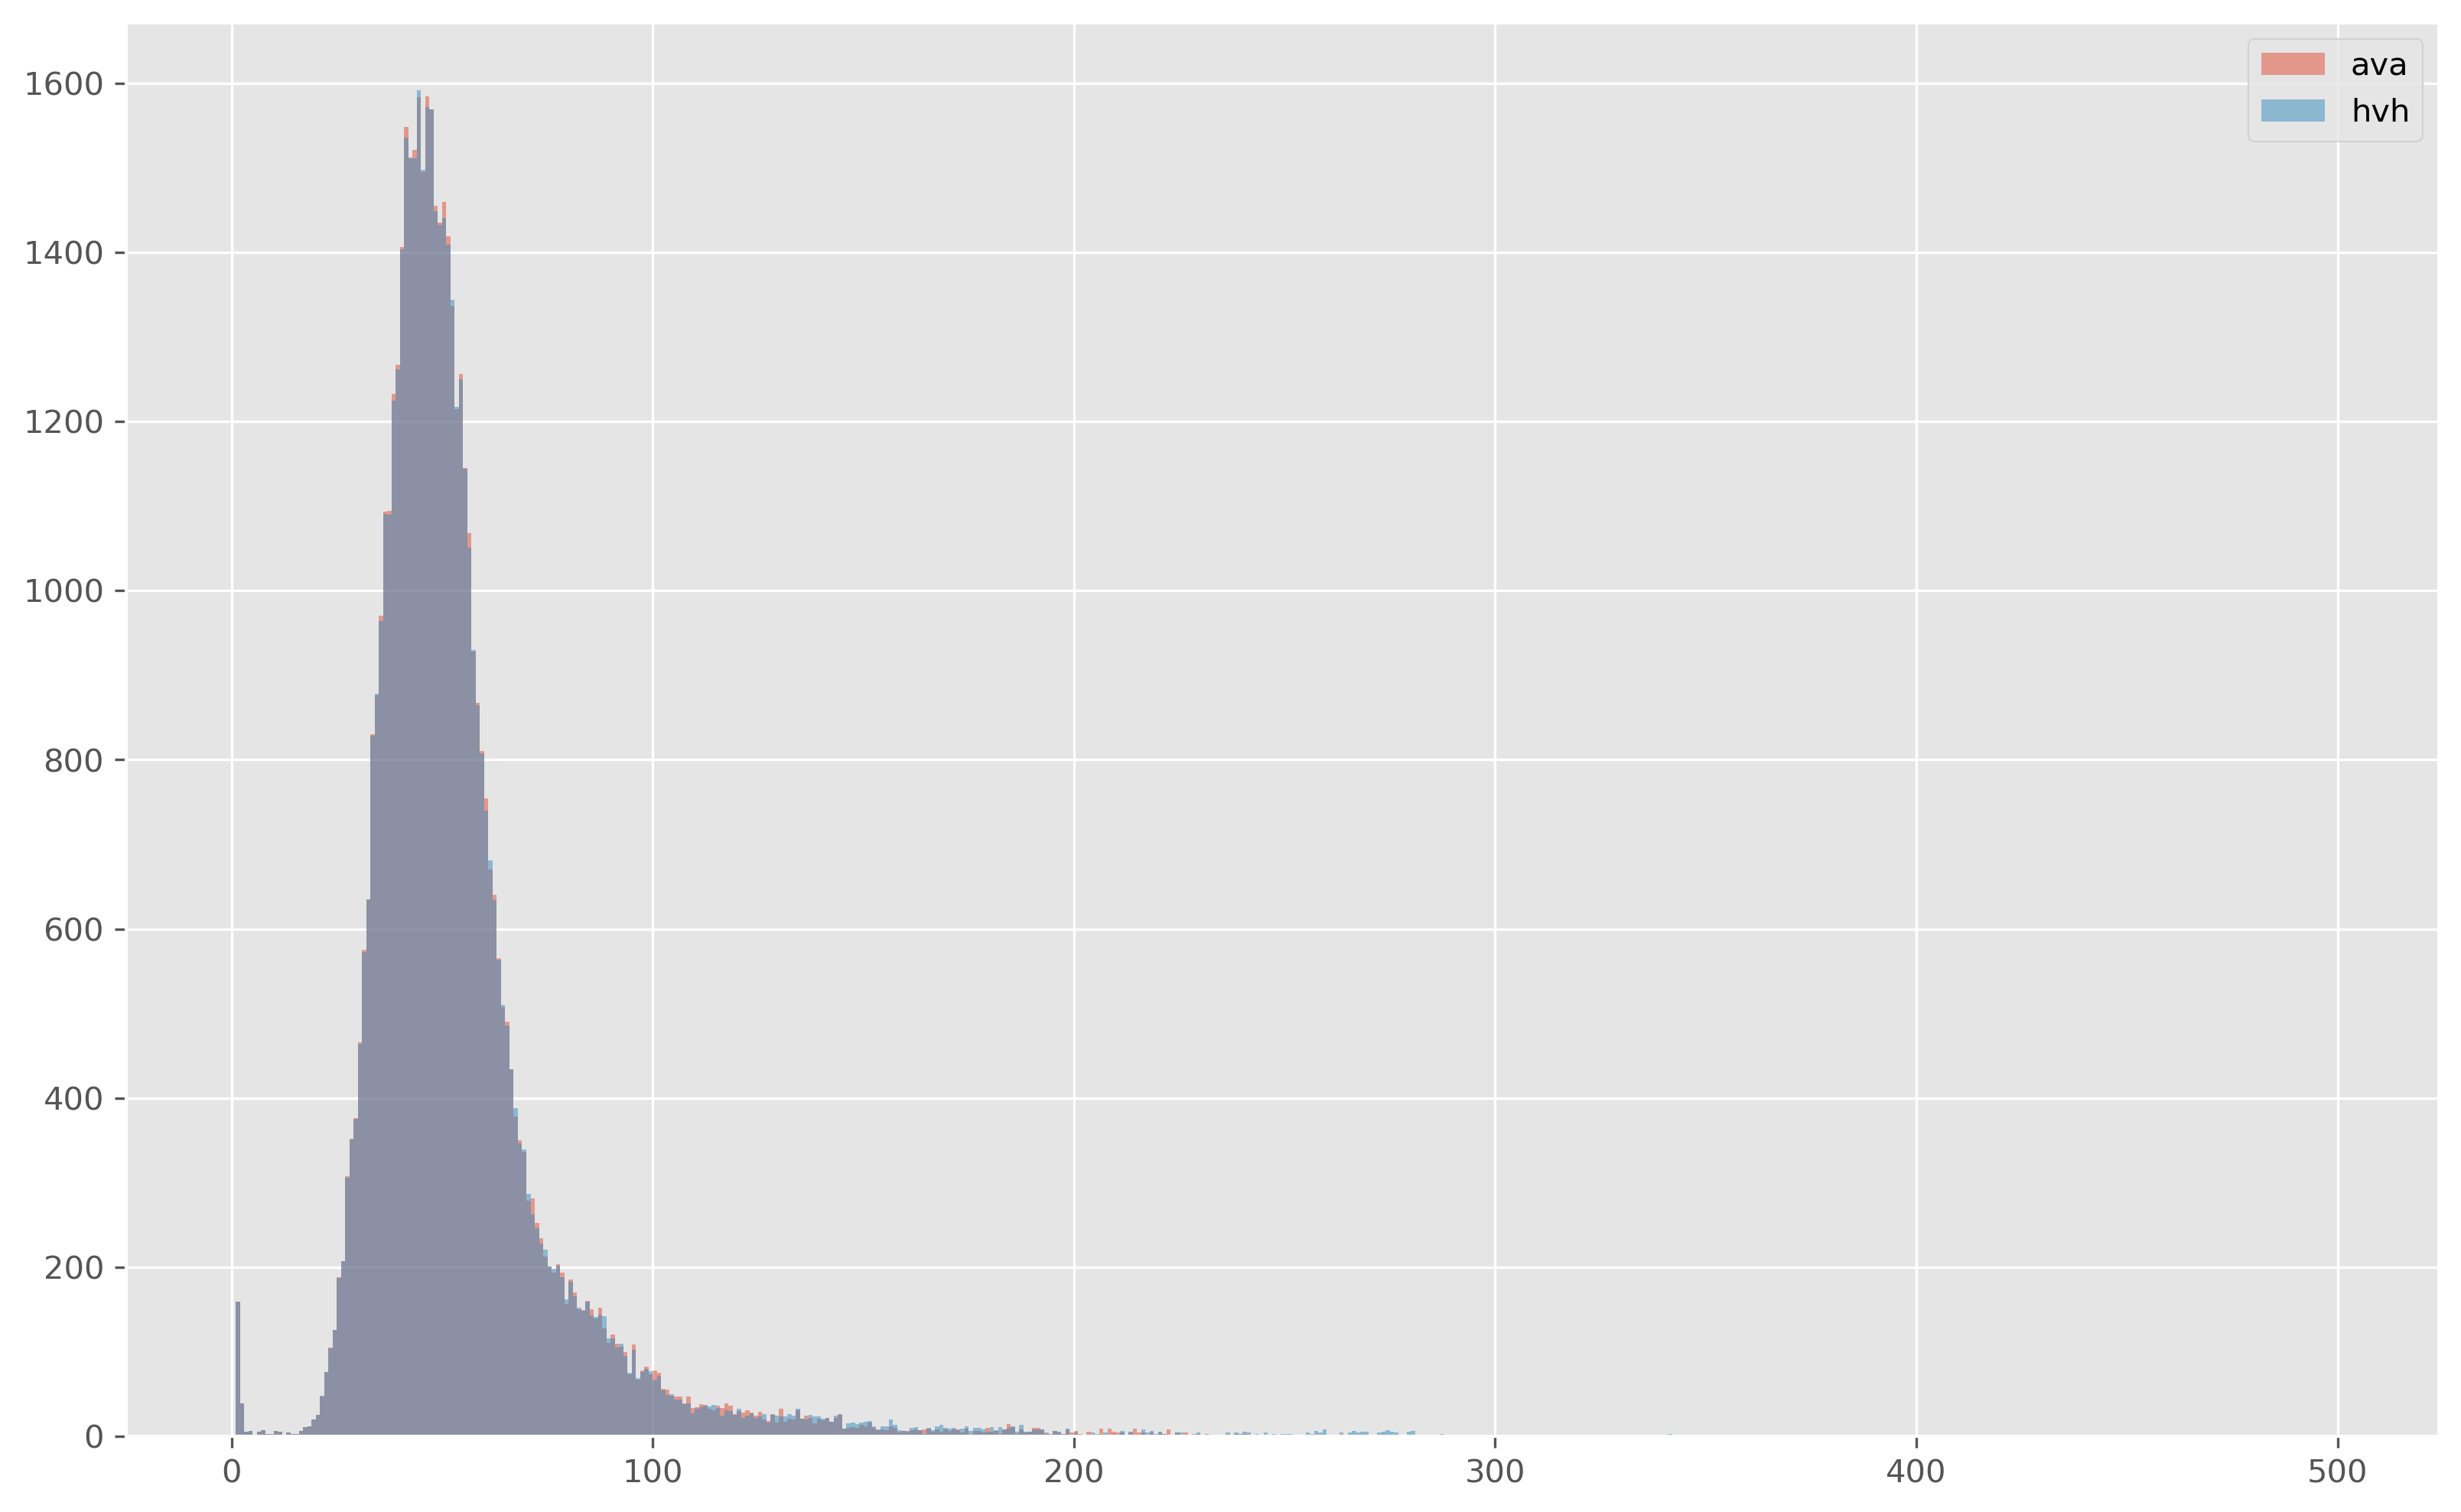

In [39]:
# plot histograms of the number of overlaps per read for ava and hvh
fig, ax = plt.subplots(dpi=300)
ax.hist(read_overlaps["ava"].values(), bins=range(0, 500, 1), alpha=0.5, label="ava")
ax.hist(read_overlaps["hvh"].values(), bins=range(0, 500, 1), alpha=0.5, label="hvh")
ax.legend()

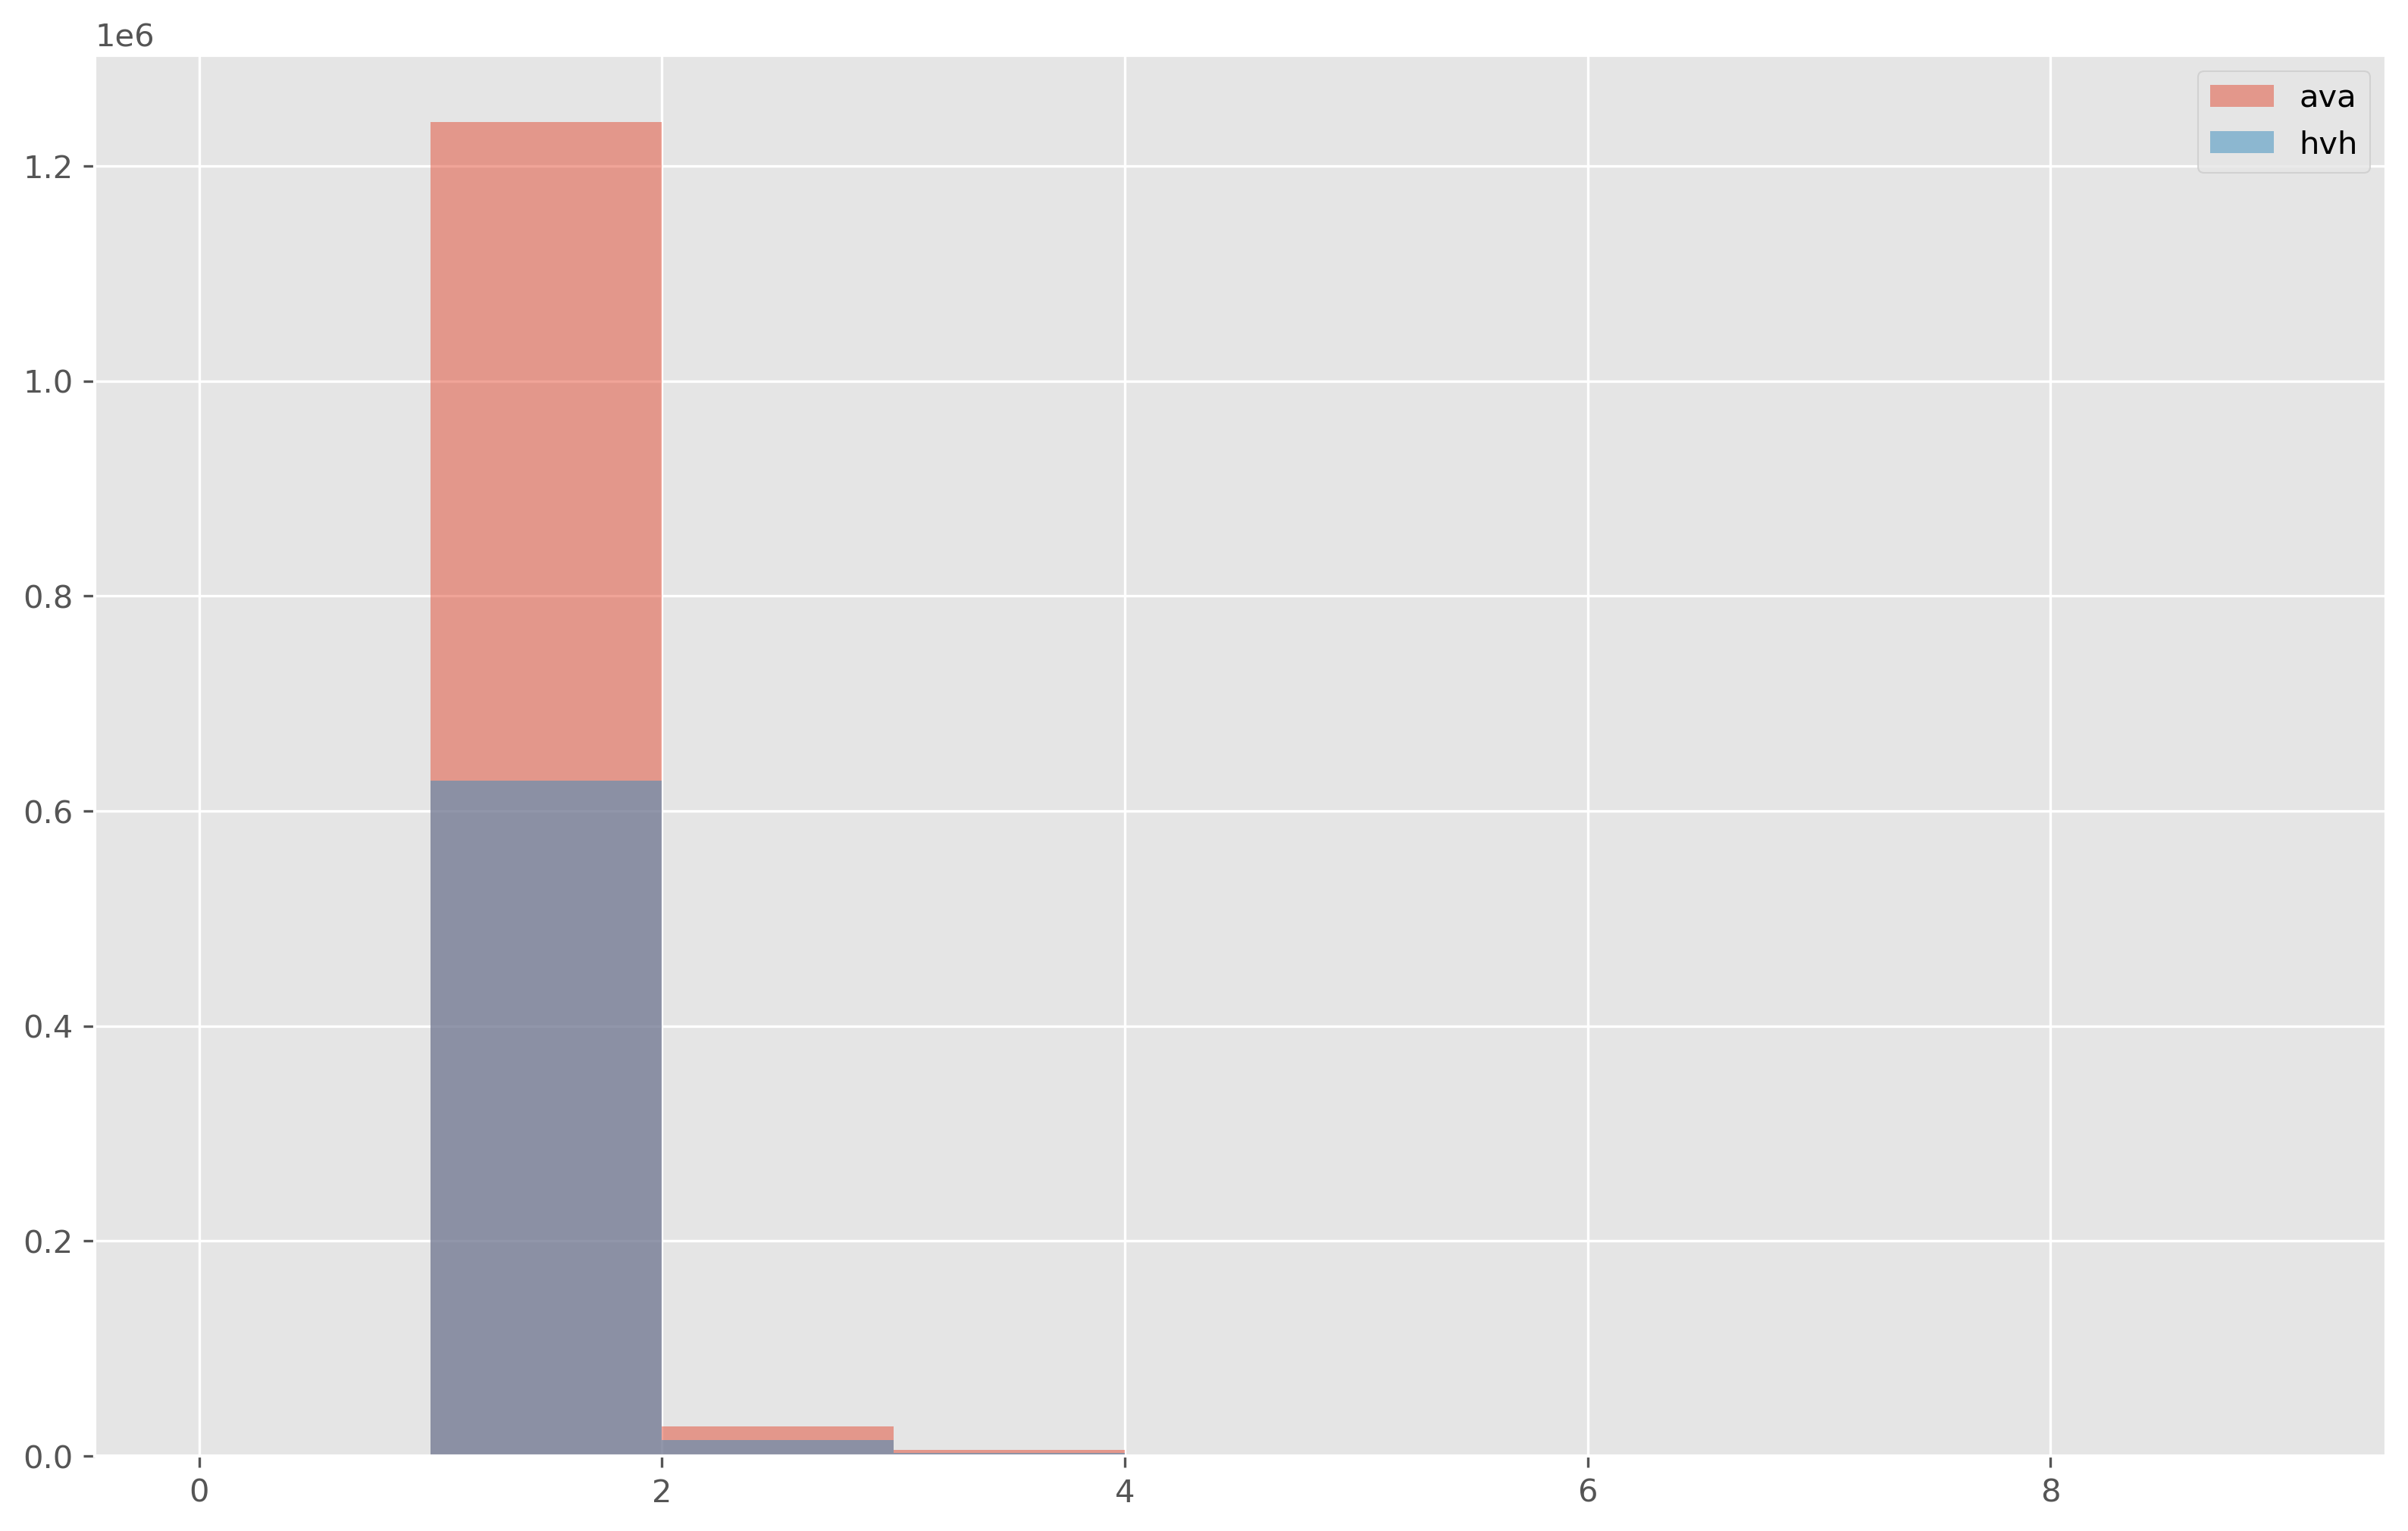

In [8]:
# plot histograms of the number of overlaps per pair for ava and hvh
fig, ax = plt.subplots(dpi=300)
ax.hist(pair_counts["ava"].values(), bins=range(0, 10, 1), alpha=0.5, label="ava")
ax.hist(pair_counts["hvh"].values(), bins=range(0, 10, 1), alpha=0.5, label="hvh")
ax.legend()

In [12]:
# list pairs with different number of overlaps in ava and hvh
num_posible_pairs = len(longest) * len(overlap)
print(f'{num_posible_pairs} possible pairs')
num_hvh_pairs = len(pair_counts["hvh"])
print(f'{num_hvh_pairs} ({num_hvh_pairs/num_posible_pairs:.2%}) pairs in hvh')
num_ava_pairs = len(pair_counts["ava"])
print(f'{num_ava_pairs} ({num_ava_pairs/num_posible_pairs:.2%}) pairs in ava')
num_common_pairs = len(set(pair_counts["hvh"].keys()).intersection(set(pair_counts["ava"].keys())))
num_common_pairs

625000000 possible pairs
647594 (0.10%) pairs in hvh
1276761 (0.20%) pairs in ava


641154

In [36]:
acc_col = "Assembly Accession"
df = pd.read_csv("../config/bacteria_lr.tsv", sep="\t", index_col=acc_col)
df

Organism Name  \
Assembly Accession                                            
GCF_002057455.1     [Actinomadura] parvosata subsp. kistnae   
GCF_040215695.1               [Arthrobacter] sp. ATCC 21022   
GCF_003595605.1                     [Bacillus] caldolyticus   
GCF_000987865.1                     [Brevibacterium] flavum   
GCF_001683055.1                [Brevibacterium] flavum ZL-1   
...                                                     ...   
GCF_027594405.1                     Zunongwangia sp. HRR-M8   
GCF_019904275.1                Zunongwangia sp. SCSIO 43204   
GCF_019316745.1                           Zymomonas mobilis   
GCF_020162135.1                           Zymomonas mobilis   
GCF_002158845.1            Zymomonas mobilis subsp. mobilis   

                    Organism Taxonomic ID Assembly BioProject Accession  \
Assembly Accession                                                        
GCF_002057455.1                   1909395                   PRJNA348567   
GCF_040215695.1                   1771959                  PRJNA1116247   
GCF_003595605.1                      1394                   PRJNA420054   
GCF_000987865.1                     92706                   PRJNA279429   
GCF_001683055.1                   1232385                   PRJNA175240   
...                                   ...                           ...   
GCF_027594405.1                   3015170                   PRJNA678113   
GCF_019904275.1                   2779359                   PRJNA668462   
GCF_019316745.1                       542                   PRJNA745480   
GCF_020162135.1                       542                   PRJNA764666   
GCF_002158845.1                    120045                   PRJNA384222   

                   Assembly BioSample Accession Assembly Name  \
Assembly Accession                                              
GCF_002057455.1                    SAMN05912833   ASM205745v1   
GCF_040215695.1                    SAMN41528051    ATCC 21022   
GCF_003595605.1                    SAMN08104862   ASM359560v1   
GCF_000987865.1                    SAMN03494310    ASM98786v1   
GCF_001683055.1                    SAMN05366914   ASM168305v1   
...                                         ...           ...   
GCF_027594405.1                    SAMN32236257  ASM2759440v1   
GCF_019904275.1                    SAMN16409657  ASM1990427v1   
GCF_019316745.1                    SAMN20166874  ASM1931674v1   
GCF_020162135.1                    SAMN21517539  ASM2016213v1   
GCF_002158845.1                    SAMN06830565   ASM215884v1   

                   Organism Infraspecific Names Strain  \
Assembly Accession                                       
GCF_002057455.1                             ATCC 55076   
GCF_040215695.1                             ATCC 21022   
GCF_003595605.1                                 NEB414   
GCF_000987865.1                             ATCC 15168   
GCF_001683055.1                                   ZL-1   
...                                                ...   
GCF_027594405.1                                 HRR-M8   
GCF_019904275.1                            SCSIO 43204   
GCF_019316745.1                                  ZM401   
GCF_020162135.1                                  ZM481   
GCF_002158845.1                            NRRL B-1960   

                   Assembly BioSample Strain   \
Assembly Accession                              
GCF_002057455.1                    ATCC 55076   
GCF_040215695.1                    ATCC 21022   
GCF_003595605.1                        NEB414   
GCF_000987865.1                    ATCC 15168   
GCF_001683055.1                          ZL-1   
...                                       ...   
GCF_027594405.1                        HRR-M8   
GCF_019904275.1                   SCSIO 43204   
GCF_019316745.1                         ZM401   
GCF_020162135.1                         ZM481   
GCF_002158845.1                   NRRL B-1960   

           

In [37]:
covg_col = "Assembly Stats Genome Coverage"
covg = []
for c in df[covg_col]:
    if type(c) == float or pd.isna(c):
        covg.append(c)
    else:
        c = float(c.replace("x", ""))
        covg.append(c)

In [38]:
df[covg_col] = covg

In [39]:
# get list of biosample accessions that are duplicated
biosample_col = "Assembly BioSample Accession"
duplicated_biosamples = df[df.duplicated(subset=biosample_col)][biosample_col].unique()
drop_indices = []
for acc in duplicated_biosamples:
    subdf = df[df[biosample_col] == acc]
    # get a list of the indices of those rows that don't have the highest coverage
    highest_covg = subdf[covg_col].idxmax()
    drop_indices.extend(subdf[subdf.index != highest_covg].index)


In [40]:
# drop the duplicated rows with lower coverage
df = df.drop(drop_indices)
df

Organism Name  \
Assembly Accession                                            
GCF_002057455.1     [Actinomadura] parvosata subsp. kistnae   
GCF_040215695.1               [Arthrobacter] sp. ATCC 21022   
GCF_003595605.1                     [Bacillus] caldolyticus   
GCF_000987865.1                     [Brevibacterium] flavum   
GCF_001683055.1                [Brevibacterium] flavum ZL-1   
...                                                     ...   
GCF_027594405.1                     Zunongwangia sp. HRR-M8   
GCF_019904275.1                Zunongwangia sp. SCSIO 43204   
GCF_019316745.1                           Zymomonas mobilis   
GCF_020162135.1                           Zymomonas mobilis   
GCF_002158845.1            Zymomonas mobilis subsp. mobilis   

                    Organism Taxonomic ID Assembly BioProject Accession  \
Assembly Accession                                                        
GCF_002057455.1                   1909395                   PRJNA348567   
GCF_040215695.1                   1771959                  PRJNA1116247   
GCF_003595605.1                      1394                   PRJNA420054   
GCF_000987865.1                     92706                   PRJNA279429   
GCF_001683055.1                   1232385                   PRJNA175240   
...                                   ...                           ...   
GCF_027594405.1                   3015170                   PRJNA678113   
GCF_019904275.1                   2779359                   PRJNA668462   
GCF_019316745.1                       542                   PRJNA745480   
GCF_020162135.1                       542                   PRJNA764666   
GCF_002158845.1                    120045                   PRJNA384222   

                   Assembly BioSample Accession Assembly Name  \
Assembly Accession                                              
GCF_002057455.1                    SAMN05912833   ASM205745v1   
GCF_040215695.1                    SAMN41528051    ATCC 21022   
GCF_003595605.1                    SAMN08104862   ASM359560v1   
GCF_000987865.1                    SAMN03494310    ASM98786v1   
GCF_001683055.1                    SAMN05366914   ASM168305v1   
...                                         ...           ...   
GCF_027594405.1                    SAMN32236257  ASM2759440v1   
GCF_019904275.1                    SAMN16409657  ASM1990427v1   
GCF_019316745.1                    SAMN20166874  ASM1931674v1   
GCF_020162135.1                    SAMN21517539  ASM2016213v1   
GCF_002158845.1                    SAMN06830565   ASM215884v1   

                   Organism Infraspecific Names Strain  \
Assembly Accession                                       
GCF_002057455.1                             ATCC 55076   
GCF_040215695.1                             ATCC 21022   
GCF_003595605.1                                 NEB414   
GCF_000987865.1                             ATCC 15168   
GCF_001683055.1                                   ZL-1   
...                                                ...   
GCF_027594405.1                                 HRR-M8   
GCF_019904275.1                            SCSIO 43204   
GCF_019316745.1                                  ZM401   
GCF_020162135.1                                  ZM481   
GCF_002158845.1                            NRRL B-1960   

                   Assembly BioSample Strain   \
Assembly Accession                              
GCF_002057455.1                    ATCC 55076   
GCF_040215695.1                    ATCC 21022   
GCF_003595605.1                        NEB414   
GCF_000987865.1                    ATCC 15168   
GCF_001683055.1                          ZL-1   
...                                       ...   
GCF_027594405.1                        HRR-M8   
GCF_019904275.1                   SCSIO 43204   
GCF_019316745.1                         ZM401   
GCF_020162135.1                         ZM481   
GCF_002158845.1                   NRRL B-1960   

           

In [41]:
import re

ont_regex = re.compile(r"Oxford|ONT|ION|OXFORD|Nano[pP]ore|NativeBarcoding")
pb_regex = re.compile(r"SMRT|PacBio|Sequel|sequel|Revio|Pacific|pacbio|Pacbio")
illumina_regex = re.compile(r"ill|umina|MiSeq|HiSeq|NextSeq|NovaSeq|iSeq", re.IGNORECASE)
other_regex = re.compile(r"454|Roche|MGI|DNB|BGI|Torrent|Bluepippin|Complete Genomics|Ion\s?PGM|Applied Biosystems|DNASEQ|DBNSEQ|IonProton|Sanger|ABI|SOLiD|Helicos|Element|Gen[eo]Lab|OpGen", re.IGNORECASE)

def standardise_tech(s: str) -> set[str]:
    techs_present = set()
    if ont_regex.search(s):
        techs_present.add("ONT")
    if pb_regex.search(s):
        techs_present.add("PacBio")
    if illumina_regex.search(s):
        techs_present.add("Illumina")
    if other_regex.search(s):
        techs_present.add("Other")
    return techs_present

In [42]:
# remove rows with missing technology
tech_col = "Assembly Sequencing Tech"
df = df[~df[tech_col].isna()]

In [43]:
new_techs = []
for val in df[tech_col]:
    techs = standardise_tech(val.strip())
    new_techs.append(";".join(techs))

In [44]:
df[tech_col] = new_techs

/tmp/ipykernel_250045/1045865421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tech_col] = new_techs


In [45]:
df

Organism Name  \
Assembly Accession                                            
GCF_002057455.1     [Actinomadura] parvosata subsp. kistnae   
GCF_040215695.1               [Arthrobacter] sp. ATCC 21022   
GCF_003595605.1                     [Bacillus] caldolyticus   
GCF_000987865.1                     [Brevibacterium] flavum   
GCF_001683055.1                [Brevibacterium] flavum ZL-1   
...                                                     ...   
GCF_027594405.1                     Zunongwangia sp. HRR-M8   
GCF_019904275.1                Zunongwangia sp. SCSIO 43204   
GCF_019316745.1                           Zymomonas mobilis   
GCF_020162135.1                           Zymomonas mobilis   
GCF_002158845.1            Zymomonas mobilis subsp. mobilis   

                    Organism Taxonomic ID Assembly BioProject Accession  \
Assembly Accession                                                        
GCF_002057455.1                   1909395                   PRJNA348567   
GCF_040215695.1                   1771959                  PRJNA1116247   
GCF_003595605.1                      1394                   PRJNA420054   
GCF_000987865.1                     92706                   PRJNA279429   
GCF_001683055.1                   1232385                   PRJNA175240   
...                                   ...                           ...   
GCF_027594405.1                   3015170                   PRJNA678113   
GCF_019904275.1                   2779359                   PRJNA668462   
GCF_019316745.1                       542                   PRJNA745480   
GCF_020162135.1                       542                   PRJNA764666   
GCF_002158845.1                    120045                   PRJNA384222   

                   Assembly BioSample Accession Assembly Name  \
Assembly Accession                                              
GCF_002057455.1                    SAMN05912833   ASM205745v1   
GCF_040215695.1                    SAMN41528051    ATCC 21022   
GCF_003595605.1                    SAMN08104862   ASM359560v1   
GCF_000987865.1                    SAMN03494310    ASM98786v1   
GCF_001683055.1                    SAMN05366914   ASM168305v1   
...                                         ...           ...   
GCF_027594405.1                    SAMN32236257  ASM2759440v1   
GCF_019904275.1                    SAMN16409657  ASM1990427v1   
GCF_019316745.1                    SAMN20166874  ASM1931674v1   
GCF_020162135.1                    SAMN21517539  ASM2016213v1   
GCF_002158845.1                    SAMN06830565   ASM215884v1   

                   Organism Infraspecific Names Strain  \
Assembly Accession                                       
GCF_002057455.1                             ATCC 55076   
GCF_040215695.1                             ATCC 21022   
GCF_003595605.1                                 NEB414   
GCF_000987865.1                             ATCC 15168   
GCF_001683055.1                                   ZL-1   
...                                                ...   
GCF_027594405.1                                 HRR-M8   
GCF_019904275.1                            SCSIO 43204   
GCF_019316745.1                                  ZM401   
GCF_020162135.1                                  ZM481   
GCF_002158845.1                            NRRL B-1960   

                   Assembly BioSample Strain  Assembly Sequencing Tech  \
Assembly Accession                                                       
GCF_002057455.1                    ATCC 55076                   PacBio   
GCF_040215695.1                    ATCC 21022             ONT;Illumina   
GCF_003595605.1                        NEB414                   PacBio   
GCF_000987865.1                    ATCC 15168          PacBio;Illumina   
GCF_001683055.1                          ZL-1                   PacBio   
...                                       ...                      ...   
GCF_027594405.1                        HRR-M8          Pa

In [46]:
# list rows which do not contain Illumina or Other technology
df[~df[tech_col].str.contains("Illumina|Other")]

Organism Name  \
Assembly Accession                                            
GCF_002057455.1     [Actinomadura] parvosata subsp. kistnae   
GCF_003595605.1                     [Bacillus] caldolyticus   
GCF_001683055.1                [Brevibacterium] flavum ZL-1   
GCF_027941655.1                      [Clostridium] scindens   
GCF_004295125.1           [Clostridium] scindens ATCC 35704   
...                                                     ...   
GCF_004353525.1                     Zhaonella formicivorans   
GCF_001586255.1                Zhongshania aliphaticivorans   
GCF_041950555.1                        Zobellella sp. DQSA1   
GCF_019904275.1                Zunongwangia sp. SCSIO 43204   
GCF_020162135.1                           Zymomonas mobilis   

                    Organism Taxonomic ID Assembly BioProject Accession  \
Assembly Accession                                                        
GCF_002057455.1                   1909395                   PRJNA348567   
GCF_003595605.1                      1394                   PRJNA420054   
GCF_001683055.1                   1232385                   PRJNA175240   
GCF_027941655.1                     29347                   PRJNA902789   
GCF_004295125.1                    411468                   PRJNA508260   
...                                   ...                           ...   
GCF_004353525.1                   2528593                   PRJNA523471   
GCF_001586255.1                   1470434                   PRJNA306719   
GCF_041950555.1                   3342386                  PRJNA1156831   
GCF_019904275.1                   2779359                   PRJNA668462   
GCF_020162135.1                       542                   PRJNA764666   

                   Assembly BioSample Accession Assembly Name  \
Assembly Accession                                              
GCF_002057455.1                    SAMN05912833   ASM205745v1   
GCF_003595605.1                    SAMN08104862   ASM359560v1   
GCF_001683055.1                    SAMN05366914   ASM168305v1   
GCF_027941655.1                    SAMN31775693  ASM2794165v1   
GCF_004295125.1                    SAMN10519000   ASM429512v1   
...                                         ...           ...   
GCF_004353525.1                    SAMN10977731   ASM435352v2   
GCF_001586255.1                    SAMN04361929   ASM158625v1   
GCF_041950555.1                    SAMN43501998  ASM4195055v1   
GCF_019904275.1                    SAMN16409657  ASM1990427v1   
GCF_020162135.1                    SAMN21517539  ASM2016213v1   

                   Organism Infraspecific Names Strain  \
Assembly Accession                                       
GCF_002057455.1                             ATCC 55076   
GCF_003595605.1                                 NEB414   
GCF_001683055.1                                   ZL-1   
GCF_027941655.1                               VPI12708   
GCF_004295125.1                             ATCC 35704   
...                                                ...   
GCF_004353525.1                                    K32   
GCF_001586255.1                                   SM-2   
GCF_041950555.1                                  DQSA1   
GCF_019904275.1                            SCSIO 43204   
GCF_020162135.1                                  ZM481   

                   Assembly BioSample Strain  Assembly Sequencing Tech  \
Assembly Accession                                                       
GCF_002057455.1                    ATCC 55076                   PacBio   
GCF_003595605.1                        NEB414                   PacBio   
GCF_001683055.1                          ZL-1                   PacBio   
GCF_027941655.1                      VPI12708                   PacBio   
GCF_004295125.1                    ATCC 35704                   PacBio   
...                                       ...                      ...   
GCF_004353525.1                           K32            

In [47]:
date_col = "Assembly Release Date"
sum(df[date_col].astype("datetime64[ns]") < "2016-01-01")

807

In [48]:
# filter out rows with release date before 2016
df = df[df[date_col].astype("datetime64[ns]") >= "2016-01-01"]
df

Organism Name  \
Assembly Accession                                            
GCF_002057455.1     [Actinomadura] parvosata subsp. kistnae   
GCF_040215695.1               [Arthrobacter] sp. ATCC 21022   
GCF_003595605.1                     [Bacillus] caldolyticus   
GCF_001683055.1                [Brevibacterium] flavum ZL-1   
GCF_025149125.1       [Clostridium] asparagiforme DSM 15981   
...                                                     ...   
GCF_027594405.1                     Zunongwangia sp. HRR-M8   
GCF_019904275.1                Zunongwangia sp. SCSIO 43204   
GCF_019316745.1                           Zymomonas mobilis   
GCF_020162135.1                           Zymomonas mobilis   
GCF_002158845.1            Zymomonas mobilis subsp. mobilis   

                    Organism Taxonomic ID Assembly BioProject Accession  \
Assembly Accession                                                        
GCF_002057455.1                   1909395                   PRJNA348567   
GCF_040215695.1                   1771959                  PRJNA1116247   
GCF_003595605.1                      1394                   PRJNA420054   
GCF_001683055.1                   1232385                   PRJNA175240   
GCF_025149125.1                    518636                   PRJNA746600   
...                                   ...                           ...   
GCF_027594405.1                   3015170                   PRJNA678113   
GCF_019904275.1                   2779359                   PRJNA668462   
GCF_019316745.1                       542                   PRJNA745480   
GCF_020162135.1                       542                   PRJNA764666   
GCF_002158845.1                    120045                   PRJNA384222   

                   Assembly BioSample Accession Assembly Name  \
Assembly Accession                                              
GCF_002057455.1                    SAMN05912833   ASM205745v1   
GCF_040215695.1                    SAMN41528051    ATCC 21022   
GCF_003595605.1                    SAMN08104862   ASM359560v1   
GCF_001683055.1                    SAMN05366914   ASM168305v1   
GCF_025149125.1                    SAMN20222674  ASM2514912v1   
...                                         ...           ...   
GCF_027594405.1                    SAMN32236257  ASM2759440v1   
GCF_019904275.1                    SAMN16409657  ASM1990427v1   
GCF_019316745.1                    SAMN20166874  ASM1931674v1   
GCF_020162135.1                    SAMN21517539  ASM2016213v1   
GCF_002158845.1                    SAMN06830565   ASM215884v1   

                   Organism Infraspecific Names Strain  \
Assembly Accession                                       
GCF_002057455.1                             ATCC 55076   
GCF_040215695.1                             ATCC 21022   
GCF_003595605.1                                 NEB414   
GCF_001683055.1                                   ZL-1   
GCF_025149125.1                              DSM 15981   
...                                                ...   
GCF_027594405.1                                 HRR-M8   
GCF_019904275.1                            SCSIO 43204   
GCF_019316745.1                                  ZM401   
GCF_020162135.1                                  ZM481   
GCF_002158845.1                            NRRL B-1960   

                   Assembly BioSample Strain  Assembly Sequencing Tech  \
Assembly Accession                                                       
GCF_002057455.1                    ATCC 55076                   PacBio   
GCF_040215695.1                    ATCC 21022             ONT;Illumina   
GCF_003595605.1                        NEB414                   PacBio   
GCF_001683055.1                          ZL-1                   PacBio   
GCF_025149125.1                     DSM 15981             ONT;Illumina   
...                                       ...                      ...   
GCF_027594405.1                        HRR-M8          Pa

In [49]:
df.to_csv("../config/bacteria_lr_filtered.tsv", sep="\t")

In [19]:
df.head()

Organism Name  \
Assembly Accession                                            
GCF_002057455.1     [Actinomadura] parvosata subsp. kistnae   
GCF_040215695.1               [Arthrobacter] sp. ATCC 21022   
GCF_003595605.1                     [Bacillus] caldolyticus   
GCF_001683055.1                [Brevibacterium] flavum ZL-1   
GCF_025149125.1       [Clostridium] asparagiforme DSM 15981   

                    Organism Taxonomic ID Assembly BioProject Accession  \
Assembly Accession                                                        
GCF_002057455.1                   1909395                   PRJNA348567   
GCF_040215695.1                   1771959                  PRJNA1116247   
GCF_003595605.1                      1394                   PRJNA420054   
GCF_001683055.1                   1232385                   PRJNA175240   
GCF_025149125.1                    518636                   PRJNA746600   

                   Assembly BioSample Accession Assembly Name  \
Assembly Accession                                              
GCF_002057455.1                    SAMN05912833   ASM205745v1   
GCF_040215695.1                    SAMN41528051    ATCC 21022   
GCF_003595605.1                    SAMN08104862   ASM359560v1   
GCF_001683055.1                    SAMN05366914   ASM168305v1   
GCF_025149125.1                    SAMN20222674  ASM2514912v1   

                   Organism Infraspecific Names Strain  \
Assembly Accession                                       
GCF_002057455.1                             ATCC 55076   
GCF_040215695.1                             ATCC 21022   
GCF_003595605.1                                 NEB414   
GCF_001683055.1                                   ZL-1   
GCF_025149125.1                              DSM 15981   

                   Assembly BioSample Strain  Assembly Sequencing Tech  \
Assembly Accession                                                       
GCF_002057455.1                    ATCC 55076                   PacBio   
GCF_040215695.1                    ATCC 21022             ONT;Illumina   
GCF_003595605.1                        NEB414                   PacBio   
GCF_001683055.1                          ZL-1                   PacBio   
GCF_025149125.1                     DSM 15981             ONT;Illumina   

                    Assembly Stats Total Number of Chromosomes  \
Assembly Accession                                               
GCF_002057455.1                                              1   
GCF_040215695.1                                              1   
GCF_003595605.1                                              2   
GCF_001683055.1                                              1   
GCF_025149125.1                                              1   

                    Assembly Stats Total Sequence Length  \
Assembly Accession                                         
GCF_002057455.1                                 13047416   
GCF_040215695.1                                  4434229   
GCF_003595605.1                                  3485582   
GCF_001683055.1                                  3340941   
GCF_025149125.1                                  6353279   

                    Assembly Stats Genome Coverage  \
Assembly Accession                                   
GCF_002057455.1                              110.0   
GCF_040215695.1                              100.0   
GCF_003595605.1                              159.9   
GCF_001683055.1                                NaN   
GCF_025149125.1                              100.0   

                   Assembly BioSample Project name    CheckM completeness  \
Assembly Accession                                                          
GCF_002057455.1                                  NaN                92.82   
GCF_040215695.1                                  NaN                99.74   
GCF_003595605.1                                  NaN                99.50   
GCF_001683055.1                                 

In [20]:
# how many assemblies have both pacbio and ont reads?
df[df[tech_col].str.contains("PacBio") & df[tech_col].str.contains("ONT")].shape[0]

51

In [21]:
# how many rows are missing checkM data
checkm_cols = ["CheckM completeness", "CheckM contamination", "CheckM completeness percentile"]
df[df[checkm_cols].isna().any(axis=1)].shape[0]

2464

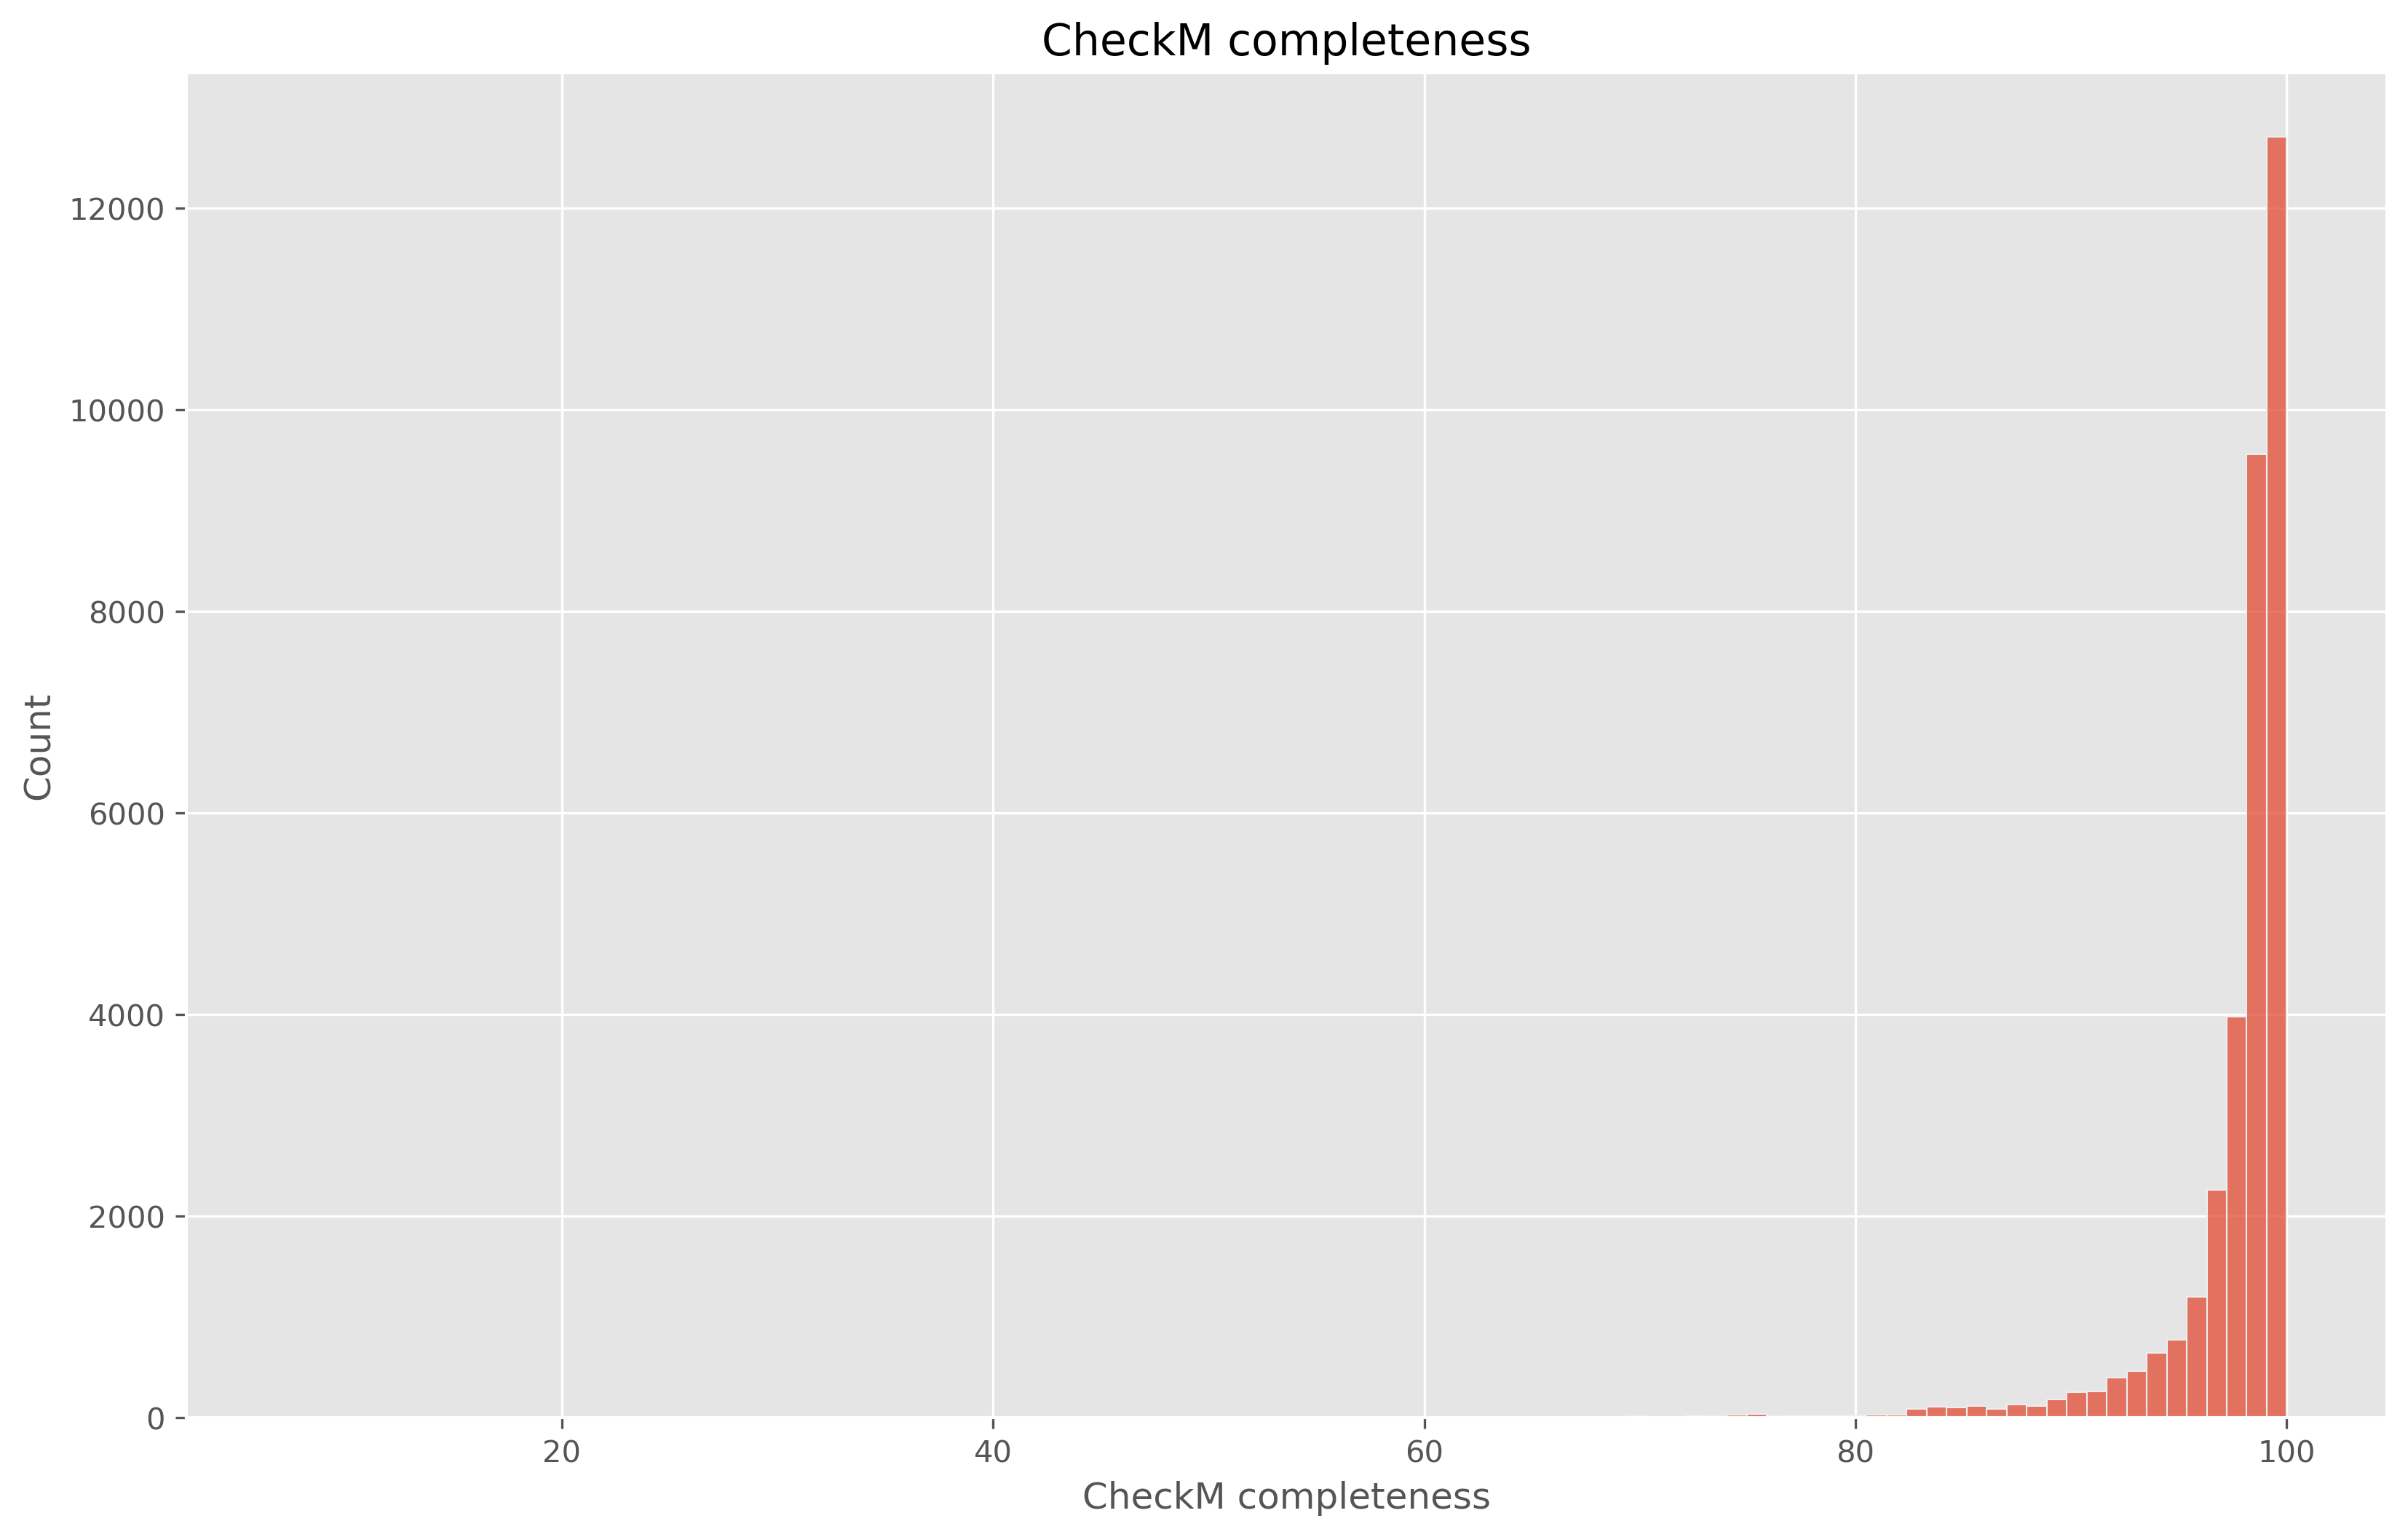

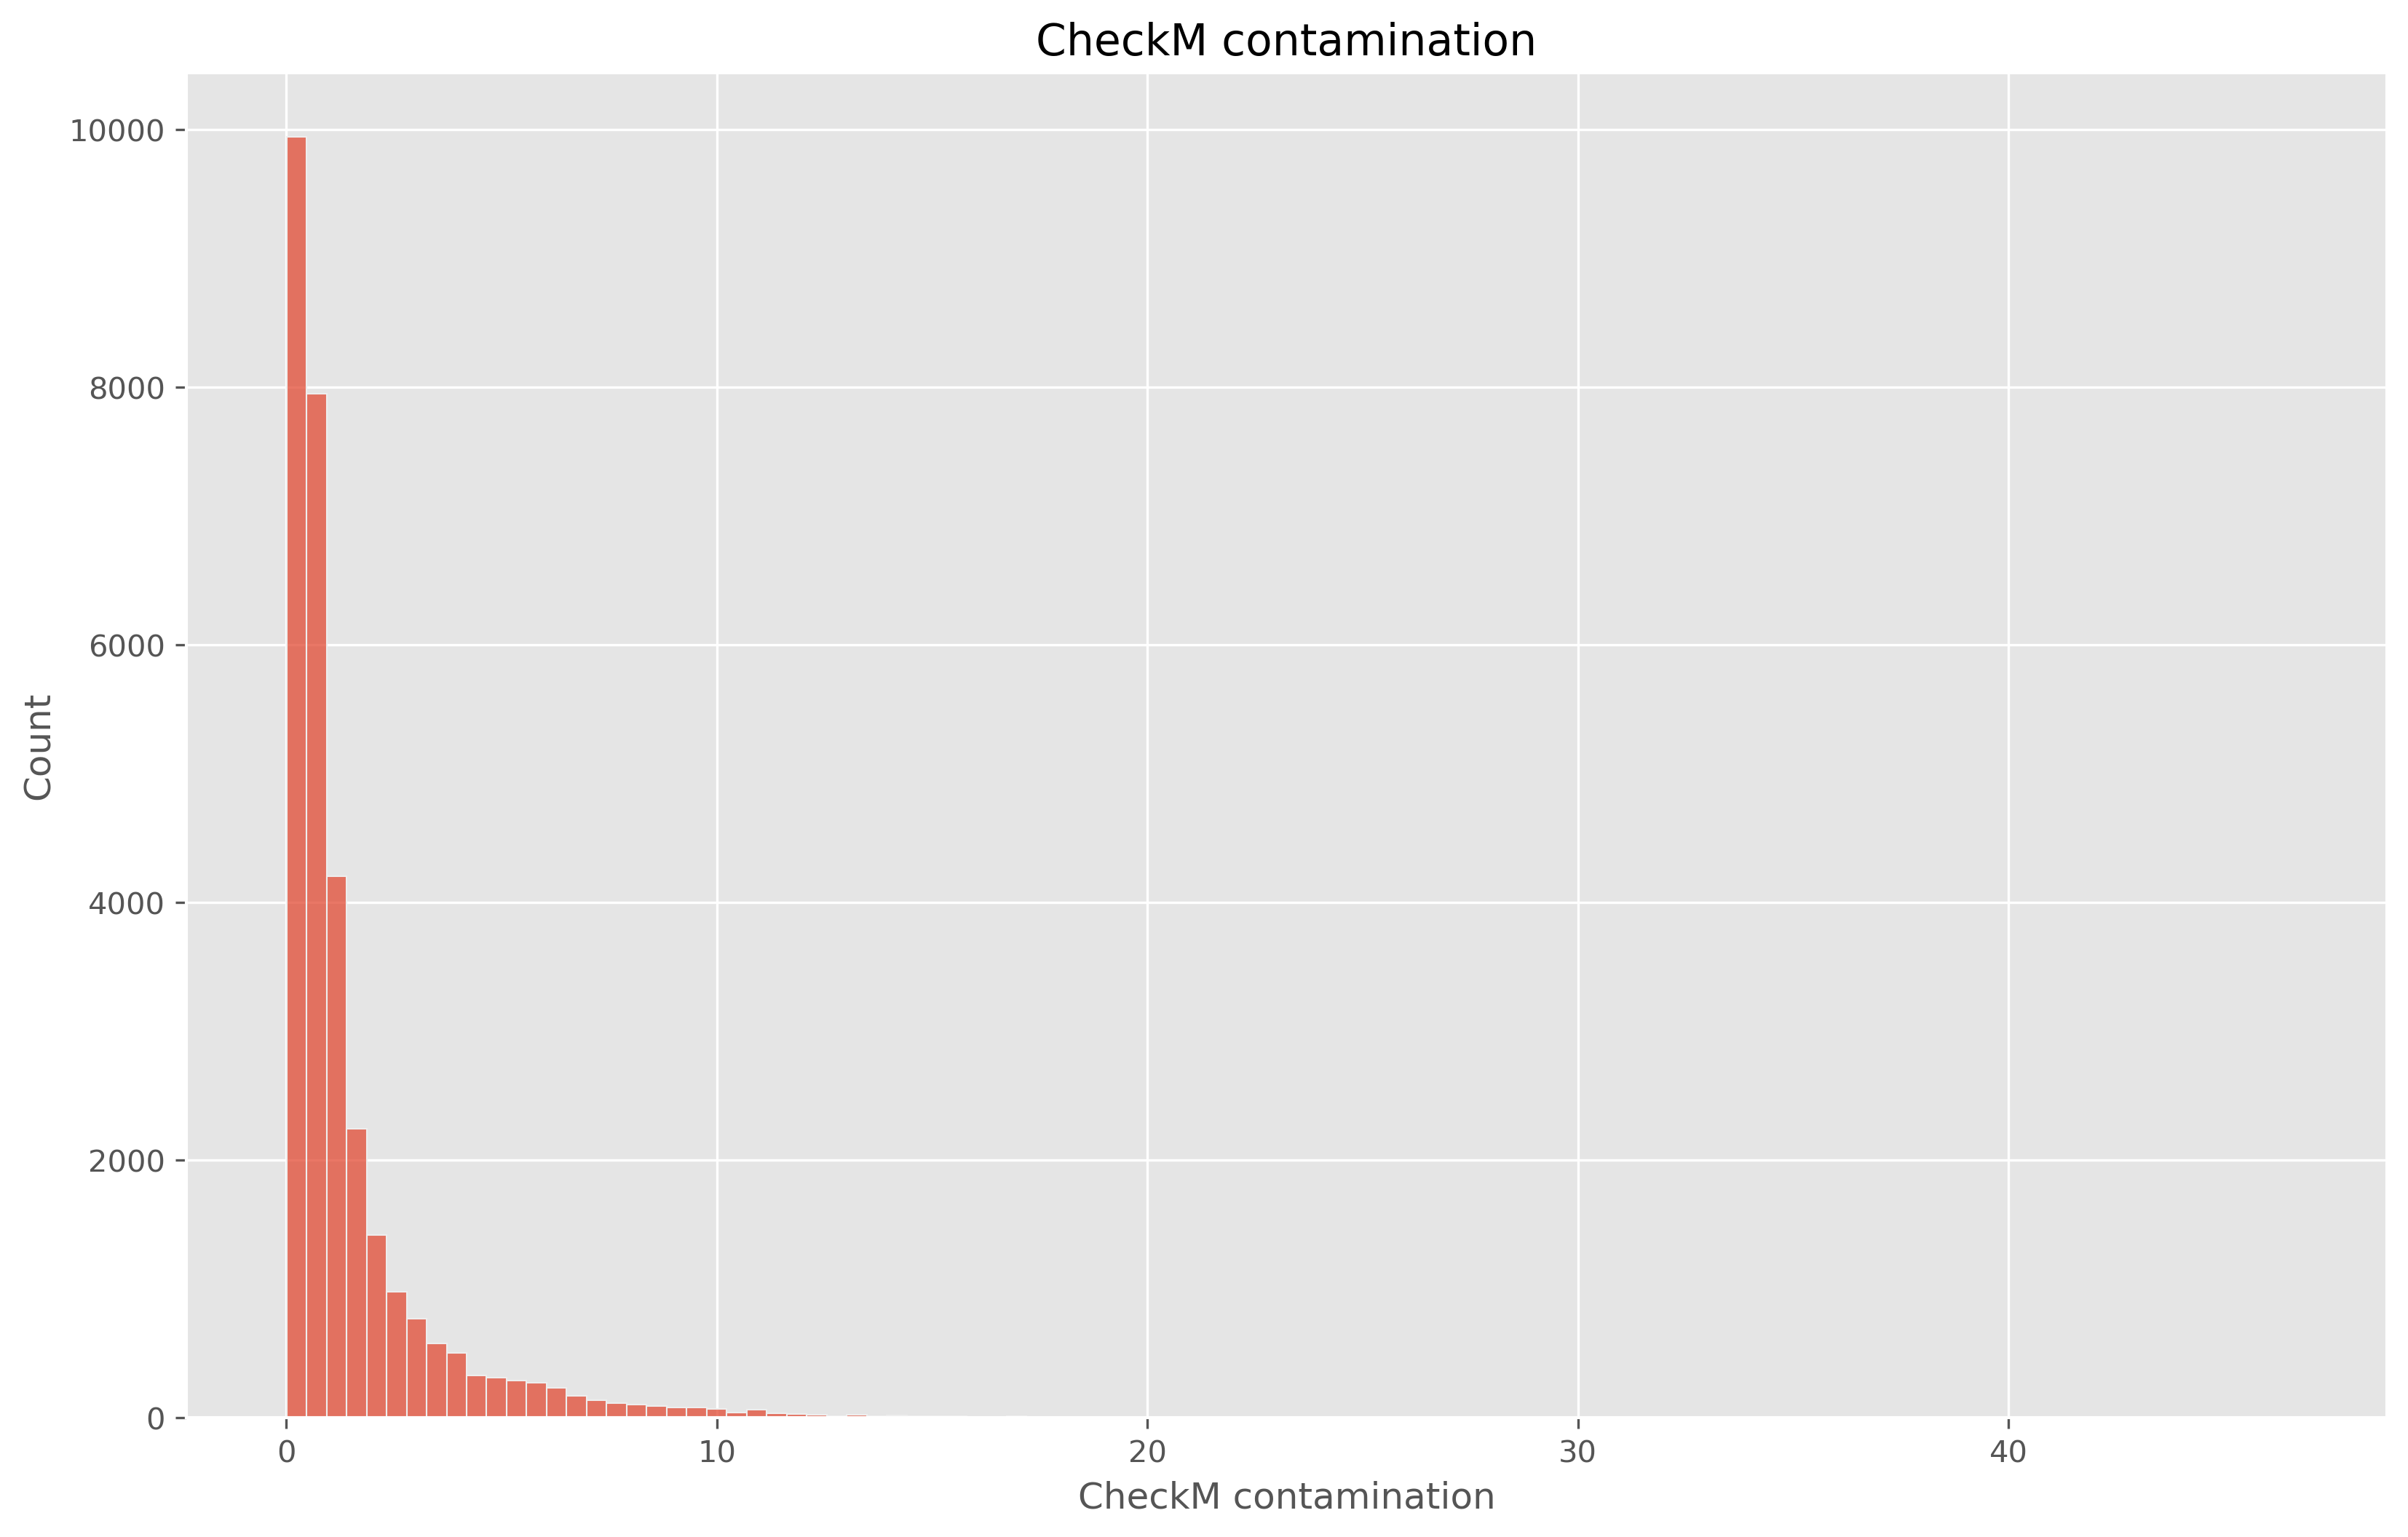

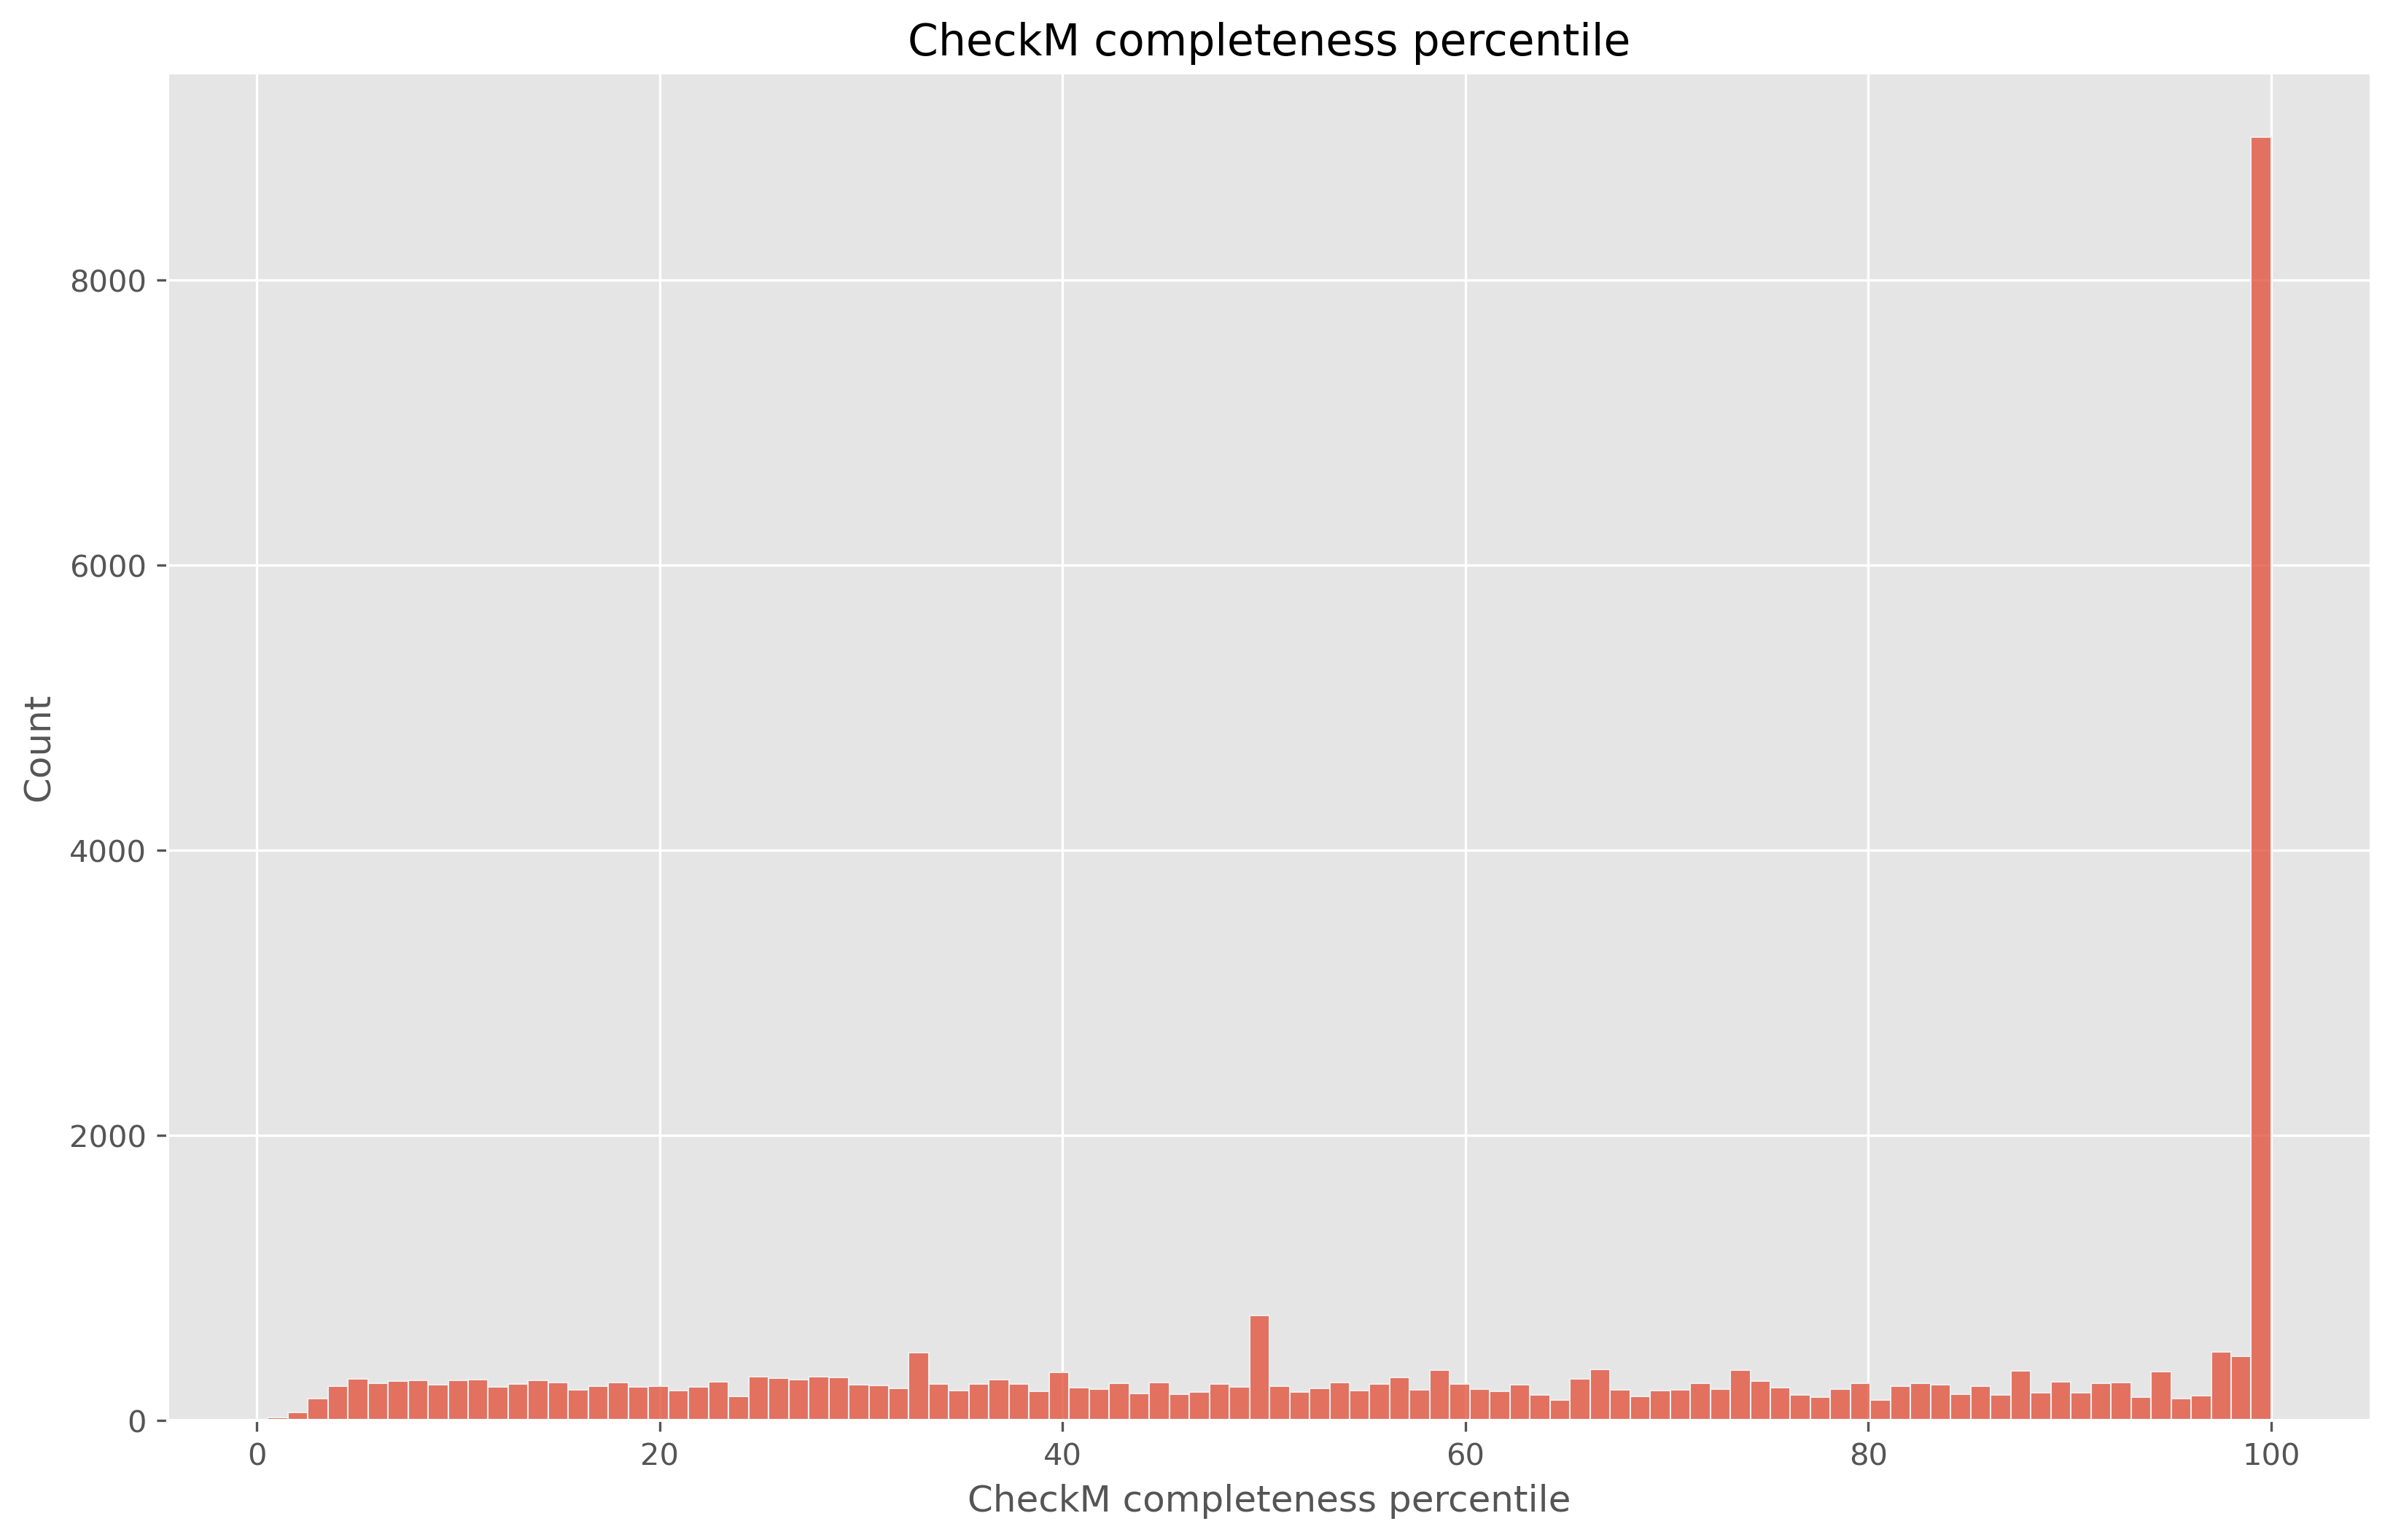

In [116]:
# plot the contamination, completeness, and completeness percentile
data = df#.query("`CheckM contamination` < 3 and `CheckM completeness percentile` > 75 and `CheckM completeness` > 95")
for col in checkm_cols:
    values = data[col].dropna().astype(float)
    fig, ax = plt.subplots(dpi=300)
    sns.histplot(values, ax=ax, bins=100)
    ax.set_title(col)


In [115]:
data

Organism Name  Organism Taxonomic ID  \
Assembly Accession                                                         
GCF_040215695.1     [Arthrobacter] sp. ATCC 21022                1771959   
GCF_003595605.1           [Bacillus] caldolyticus                   1394   
GCF_009684695.1            [Clostridium] scindens                  29347   
GCF_016889005.1            [Clostridium] scindens                  29347   
GCF_022845815.1            [Clostridium] scindens                  29347   
...                                           ...                    ...   
GCF_041950555.1              Zobellella sp. DQSA1                3342386   
GCF_029323795.1       Zobellia alginiliquefaciens                3032586   
GCF_027594425.1          Zunongwangia sp. HGR-M22                3015168   
GCF_027594405.1           Zunongwangia sp. HRR-M8                3015170   
GCF_019904275.1      Zunongwangia sp. SCSIO 43204                2779359   

                   Assembly BioProject Accession Assembly BioSample Accession  \
Assembly Accession                                                              
GCF_040215695.1                     PRJNA1116247                 SAMN41528051   
GCF_003595605.1                      PRJNA420054                 SAMN08104862   
GCF_009684695.1                      PRJNA561470                 SAMN13152203   
GCF_016889005.1                      PRJNA231221                 SAMN16357369   
GCF_022845815.1                       PRJDB11902                 SAMD00389867   
...                                          ...                          ...   
GCF_041950555.1                     PRJNA1156831                 SAMN43501998   
GCF_029323795.1                      PRJNA941813                 SAMN33610405   
GCF_027594425.1                      PRJNA678113                 SAMN32236153   
GCF_027594405.1                      PRJNA678113                 SAMN32236257   
GCF_019904275.1                      PRJNA668462                 SAMN16409657   

                   Assembly Name Organism Infraspecific Names Strain  \
Assembly Accession                                                     
GCF_040215695.1       ATCC 21022                          ATCC 21022   
GCF_003595605.1      ASM359560v1                              NEB414   
GCF_009684695.1      ASM968469v1                           BL389WT3D   
GCF_016889005.1     ASM1688900v1                       FDAARGOS_1227   
GCF_022845815.1     ASM2284581v1                           CE91-St59   
...                          ...                                 ...   
GCF_041950555.1     ASM4195055v1                               DQSA1   
GCF_029323795.1     ASM2932379v1                         LLG6346-3.1   
GCF_027594425.1     ASM2759442v1                             HGR-M22   
GCF_027594405.1     ASM2759440v1                              HRR-M8   
GCF_019904275.1     ASM1990427v1                         SCSIO 43204   

                   Assembly BioSample Strain  Assembly Sequencing Tech  \
Assembly Accession                                                       
GCF_040215695.1                    ATCC 21022             ONT;Illumina   
GCF_003595605.1                        NEB414                   PacBio   
GCF_009684695.1                     BL389WT3D                      ONT   
GCF_016889005.1                 FDAARGOS_1227          PacBio;Illumina   
GCF_022845815.1                     CE91-St59          PacBio;Illumina   
...                                       ...                      ...   
GCF_041950555.1                         DQSA1                   PacBio   
GCF_029323795.1                   LLG6346-3.1             ONT;Illumina   
GCF_027594425.1                       HGR-M22          PacBio;Illumina   
GCF_027594405.1                        HRR-M8          PacBio;Illumina   
GCF_019904275.1                   SCSIO 43204                   PacBio   

                    Assembly Stats Total Number of Chromosomes  \
Assembly Accession         

In [30]:
runs = pd.read_csv("../config/bacteria_lr_runs.tsv", sep="\t", index_col="Run Accession")

In [31]:
runs

Assembly Accession                          Organism Name  \
Run Accession                                                             
SRR29457729      GCF_040215695.1          [Arthrobacter] sp. ATCC 21022   
SRR15171290      GCF_025149125.1  [Clostridium] asparagiforme DSM 15981   
DRR307118        GCF_022845755.1                [Clostridium] hylemonae   
SRR13182350      GCF_016889005.1                 [Clostridium] scindens   
DRR307121        GCF_022845815.1                 [Clostridium] scindens   
...                          ...                                    ...   
SRR10064731      GCF_005937895.2                   Yersinia sp. KBS0713   
SRR22225499      GCF_026183365.1     Yersinia sp. SCPM-O-B-9106 (C-191)   
SRR5614824       GCF_002158905.1                   Yoonia vestfoldensis   
SRR10083736      GCF_008000755.1                  Youhaiella tibetensis   
SRR17544102      GCF_004353525.1                Zhaonella formicivorans   

               Organism Taxonomic ID Assembly BioProject Accession  \
Run Accession                                                        
SRR29457729                  1771959                  PRJNA1116247   
SRR15171290                   518636                   PRJNA746600   
DRR307118                      89153                    PRJDB11902   
SRR13182350                    29347                   PRJNA231221   
DRR307121                      29347                    PRJDB11902   
...                              ...                           ...   
SRR10064731                  1179669                   PRJNA539822   
SRR22225499                  2992843                   PRJNA269675   
SRR5614824                    245188                   PRJNA380207   
SRR10083736                  1447062                   PRJNA553275   
SRR17544102                  2528593                   PRJNA523471   

              Assembly BioSample Accession Assembly Name  \
Run Accession                                              
SRR29457729                   SAMN41528051    ATCC 21022   
SRR15171290                   SAMN20222674  ASM2514912v1   
DRR307118                     SAMD00389864  ASM2284575v1   
SRR13182350                   SAMN16357369  ASM1688900v1   
DRR307121                     SAMD00389867  ASM2284581v1   
...                                    ...           ...   
SRR10064731                   SAMN11620949   ASM593789v2   
SRR22225499                   SAMN31564381  ASM2618336v1   
SRR5614824                    SAMN07142919   ASM215890v1   
SRR10083736                   SAMN12233448   ASM800075v1   
SRR17544102                   SAMN10977731   ASM435352v2   

              Organism Infraspecific Names Strain Assembly BioSample Strain   \
Run Accession                                                                  
SRR29457729                            ATCC 21022                 ATCC 21022   
SRR15171290                             DSM 15981                  DSM 15981   
DRR307118                               CE91-St63                  CE91-St63   
SRR13182350                         FDAARGOS_1227              FDAARGOS_1227   
DRR307121                               CE91-St59                  CE91-St59   
...                                           ...                        ...   
SRR10064731                               KBS0713                    KBS0713   
SRR22225499                 SCPM-O-B-9106 (C-191)      SCPM-O-B-9106 (C-191)   
SRR5614824                                  SMR4r                      SMR4r   
SRR10083736                                  fig4                       fig4   
SRR17544102                                   K32                        K32   

              Assembly Sequencing Tech  \
Run Accession                            
SRR29457729               Illumina;ONT   
SRR15171290               Illumina;ONT   
DRR307118              Illumina;PacBio   
SRR13182350            Illumina;PacBio   
DRR307121              Illumina;PacBio   
...        

In [32]:
runs.groupby("Instrument Platform").size()

Instrument Platform
OXFORD_NANOPORE    7611
PACBIO_SMRT        6894
dtype: int64

In [33]:
runs_filt = runs.query("`CheckM contamination` < 3 and `CheckM completeness percentile` > 75 and `CheckM completeness` > 95")

In [34]:
runs_filt.groupby("Instrument Platform").size()

Instrument Platform
OXFORD_NANOPORE    2593
PACBIO_SMRT        2219
dtype: int64

In [50]:
# add the release date to the runs dataframe
missing = []
for ix in runs_filt.index:
    asm_acc = runs_filt.loc[ix, "Assembly Accession"]
    if asm_acc not in df.index:
        missing.append(asm_acc)
    else:
        runs_filt.loc[ix, date_col] = df.loc[asm_acc, date_col]

In [53]:
# remove the runs whose asm accession is missing from the filtered dataframe
runs_filt = runs_filt[~runs_filt["Assembly Accession"].isin(missing)]

In [54]:
runs_filt.to_csv("../config/bacteria_lr_runs.filtered.tsv", sep="\t")

In [158]:
row.to_csv(sep="\t", header=False)

'Organism Name\t[Actinomadura] parvosata subsp. kistnae\nOrganism Taxonomic ID\t1909395\nAssembly BioProject Accession\tPRJNA348567\nAssembly BioSample Accession\tSAMN05912833\nAssembly Name\tASM205745v1\nOrganism Infraspecific Names Strain\tATCC 55076\nAssembly BioSample Strain \tATCC 55076\nAssembly Sequencing Tech\tPacBio\nAssembly Stats Total Number of Chromosomes\t1\nAssembly Stats Total Sequence Length\t13047416\nAssembly Stats Genome Coverage\t110.0\nAssembly BioSample Project name  \t\n'

In [163]:
row.to_list()

['[Actinomadura] parvosata subsp. kistnae',
 np.int64(1909395),
 'PRJNA348567',
 'SAMN05912833',
 'ASM205745v1',
 'ATCC 55076',
 'ATCC 55076',
 'PacBio',
 np.int64(1),
 np.int64(13047416),
 np.float64(110.0),
 nan]

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [28]:
named_colors = {
    "black": "#000000",
    "orange": "#e69f00",
    "skyblue": "#56b4e9",
    "bluish green": "#009e73",
    "yellow": "#f0e442",
    "blue": "#0072b2",
    "vermilion": "#d55e00",
    "reddish purple": "#cc79a7",
}
cud_palette = list(named_colors.values())

Checking the ava and 2set approaches on some test data

In [3]:
df = pd.read_csv("../results/estimates/estimates.tsv", sep="\t")
df["abs_relative_error"] = df["relative_error"].abs()
df

asm_accession                            organism    taxid  \
0      GCF_040215695.1       [Arthrobacter] sp. ATCC 21022  1771959   
1      GCF_040215695.1       [Arthrobacter] sp. ATCC 21022  1771959   
2      GCF_040215695.1       [Arthrobacter] sp. ATCC 21022  1771959   
3      GCF_040215695.1       [Arthrobacter] sp. ATCC 21022  1771959   
4      GCF_016889005.1              [Clostridium] scindens    29347   
...                ...                                 ...      ...   
19243  GCF_026183365.1  Yersinia sp. SCPM-O-B-9106 (C-191)  2992843   
19244  GCF_004353525.1             Zhaonella formicivorans  2528593   
19245  GCF_004353525.1             Zhaonella formicivorans  2528593   
19246  GCF_004353525.1             Zhaonella formicivorans  2528593   
19247  GCF_004353525.1             Zhaonella formicivorans  2528593   

         bioproject     biosample                 strain     asm_seq_tech  \
0      PRJNA1116247  SAMN41528051             ATCC 21022     Illumina;ONT   
1      PRJNA1116247  SAMN41528051             ATCC 21022     Illumina;ONT   
2      PRJNA1116247  SAMN41528051             ATCC 21022     Illumina;ONT   
3      PRJNA1116247  SAMN41528051             ATCC 21022     Illumina;ONT   
4       PRJNA231221  SAMN16357369          FDAARGOS_1227  Illumina;PacBio   
...             ...           ...                    ...              ...   
19243   PRJNA269675  SAMN31564381  SCPM-O-B-9106 (C-191)        Other;ONT   
19244   PRJNA523471  SAMN10977731                    K32              ONT   
19245   PRJNA523471  SAMN10977731                    K32              ONT   
19246   PRJNA523471  SAMN10977731                    K32              ONT   
19247   PRJNA523471  SAMN10977731                    K32              ONT   

       n_chromosomes  true_size  asm_coverage  ... checkm_contamination  \
0                  1    4434229         100.0  ...                 0.18   
1                  1    4434229         100.0  ...                 0.18   
2                  1    4434229         100.0  ...                 0.18   
3                  1    4434229         100.0  ...                 0.18   
4                  1    3619096        1116.1  ...                 0.07   
...              ...        ...           ...  ...                  ...   
19243              1    4417639         172.5  ...                 0.18   
19244              1    3314304         400.0  ...                 1.82   
19245              1    3314304         400.0  ...                 1.82   
19246              1    3314304         400.0  ...                 1.82   
19247              1    3314304         400.0  ...                 1.82   

       checkm_completeness_percentile          run      estimate       method  \
0                               100.0  SRR29457729  3.532696e+06     lrge-ava   
1                               100.0  SRR29457729  3.471188e+06    lrge-2set   
2                               100.0  SRR29457729  1.104850e+07         mash   
3                               100.0  SRR29457729  3.681732e+06  genomescope   
4                               100.0  SRR13182350  3.616480e+06     lrge-ava   
...                               ...          ...           ...          ...   
19243                           100.0  SRR22225499  3.681732e+06  genomescope   
19244                           100.0  SRR17544102  3.540197e+06     lrge-ava   
19245                           100.0  SRR17544102  3.515122e+06    lrge-2set   
19246                           100.0  SRR17544102  1.104850e+07         mash   
19247                           100.0  SRR17544102  3.681732e+06  genomescope   

       relative_size relative_error  cpu_time  memory_mb  abs_relative_error  
0           0.796688     -20.331223    177.30    3059.30           20.331223  
1           0.782817     -21.718337     38.90     544.44           21.718337  
2           2.491639     149.163947     75.03    1451.32          149.163947  
3           0.830298     -16.970188     8

/tmp/ipykernel_234242/2234034952.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, linewidth=1, scale="width")


[Text(0, -100, '-100'),
 Text(0, -10, '-10'),
 Text(0, -1, '-1'),
 Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 10, '10'),
 Text(0, 100, '100'),
 Text(0, 1000, '1000')]

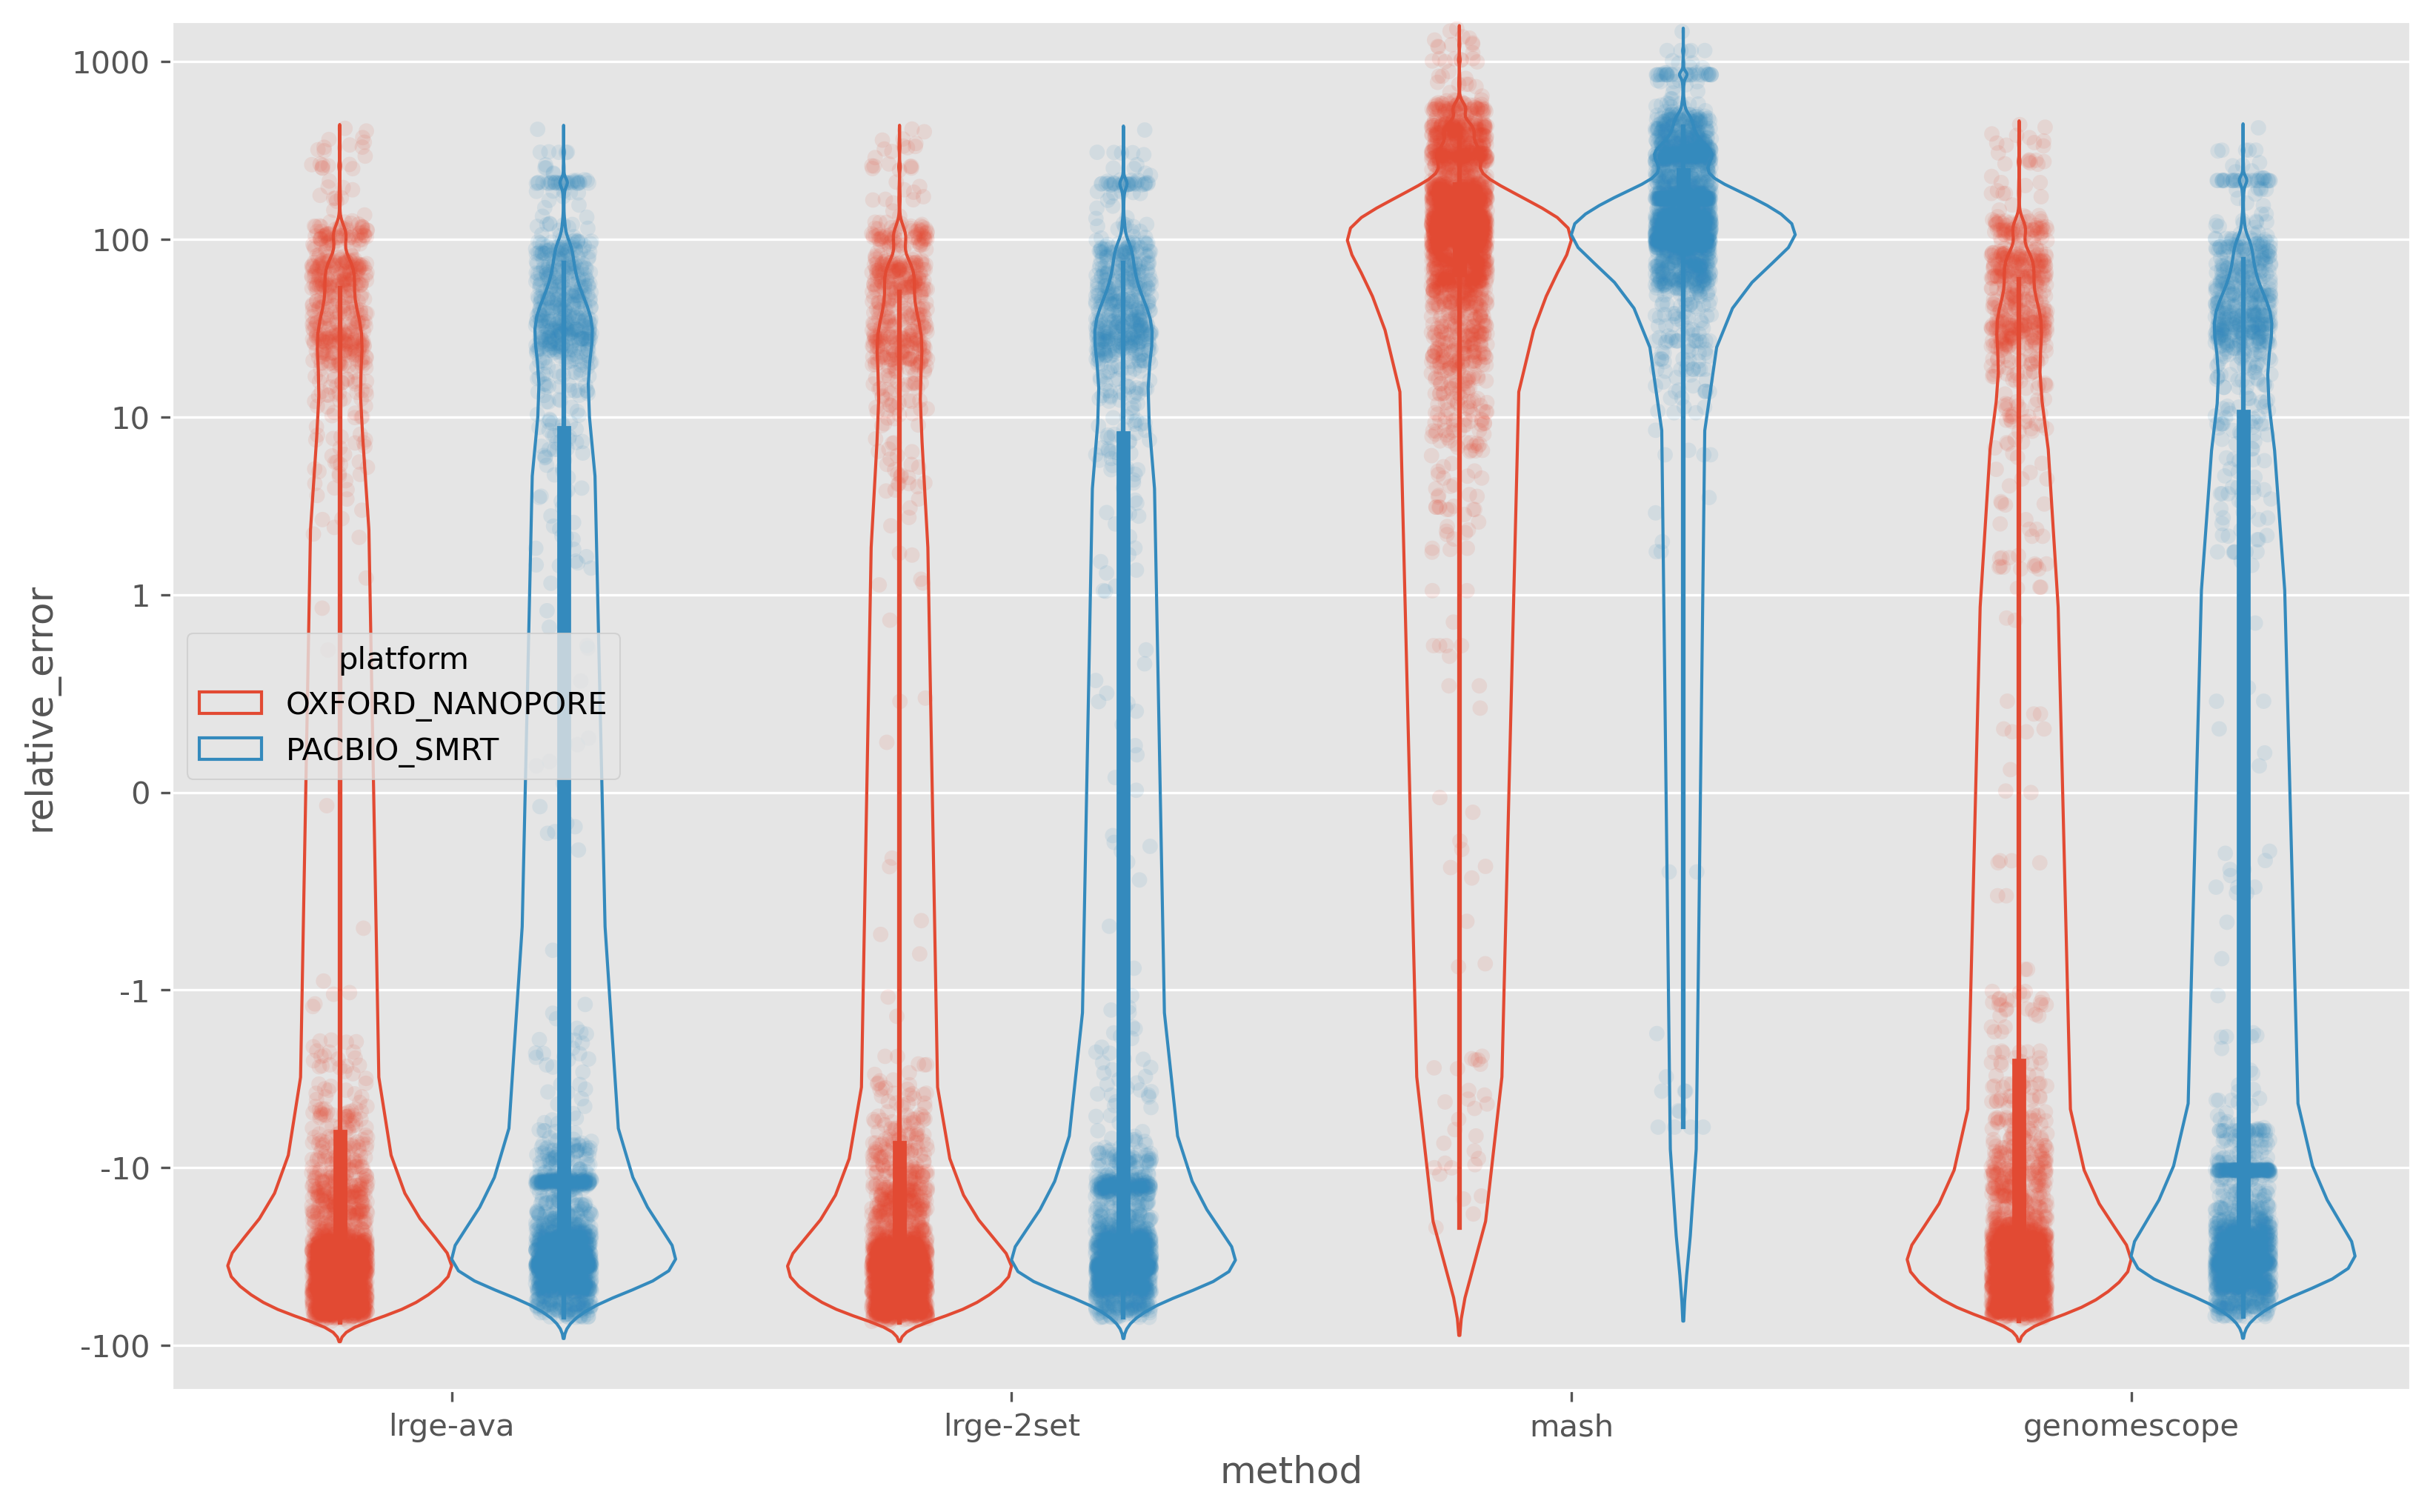

In [4]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "relative_error"
hue = "platform"
data = df
# sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, linewidth=1, scale="width")
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.1, legend=False)
ax.set_yscale("symlog", linthresh=1)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

/tmp/ipykernel_234242/641456145.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, edgecolor="black", alpha=0.5, palette=cud_palette)


[Text(0, -100, '-100'),
 Text(0, -10, '-10'),
 Text(0, -1, '-1'),
 Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 10, '10'),
 Text(0, 100, '100'),
 Text(0, 1000, '1000')]

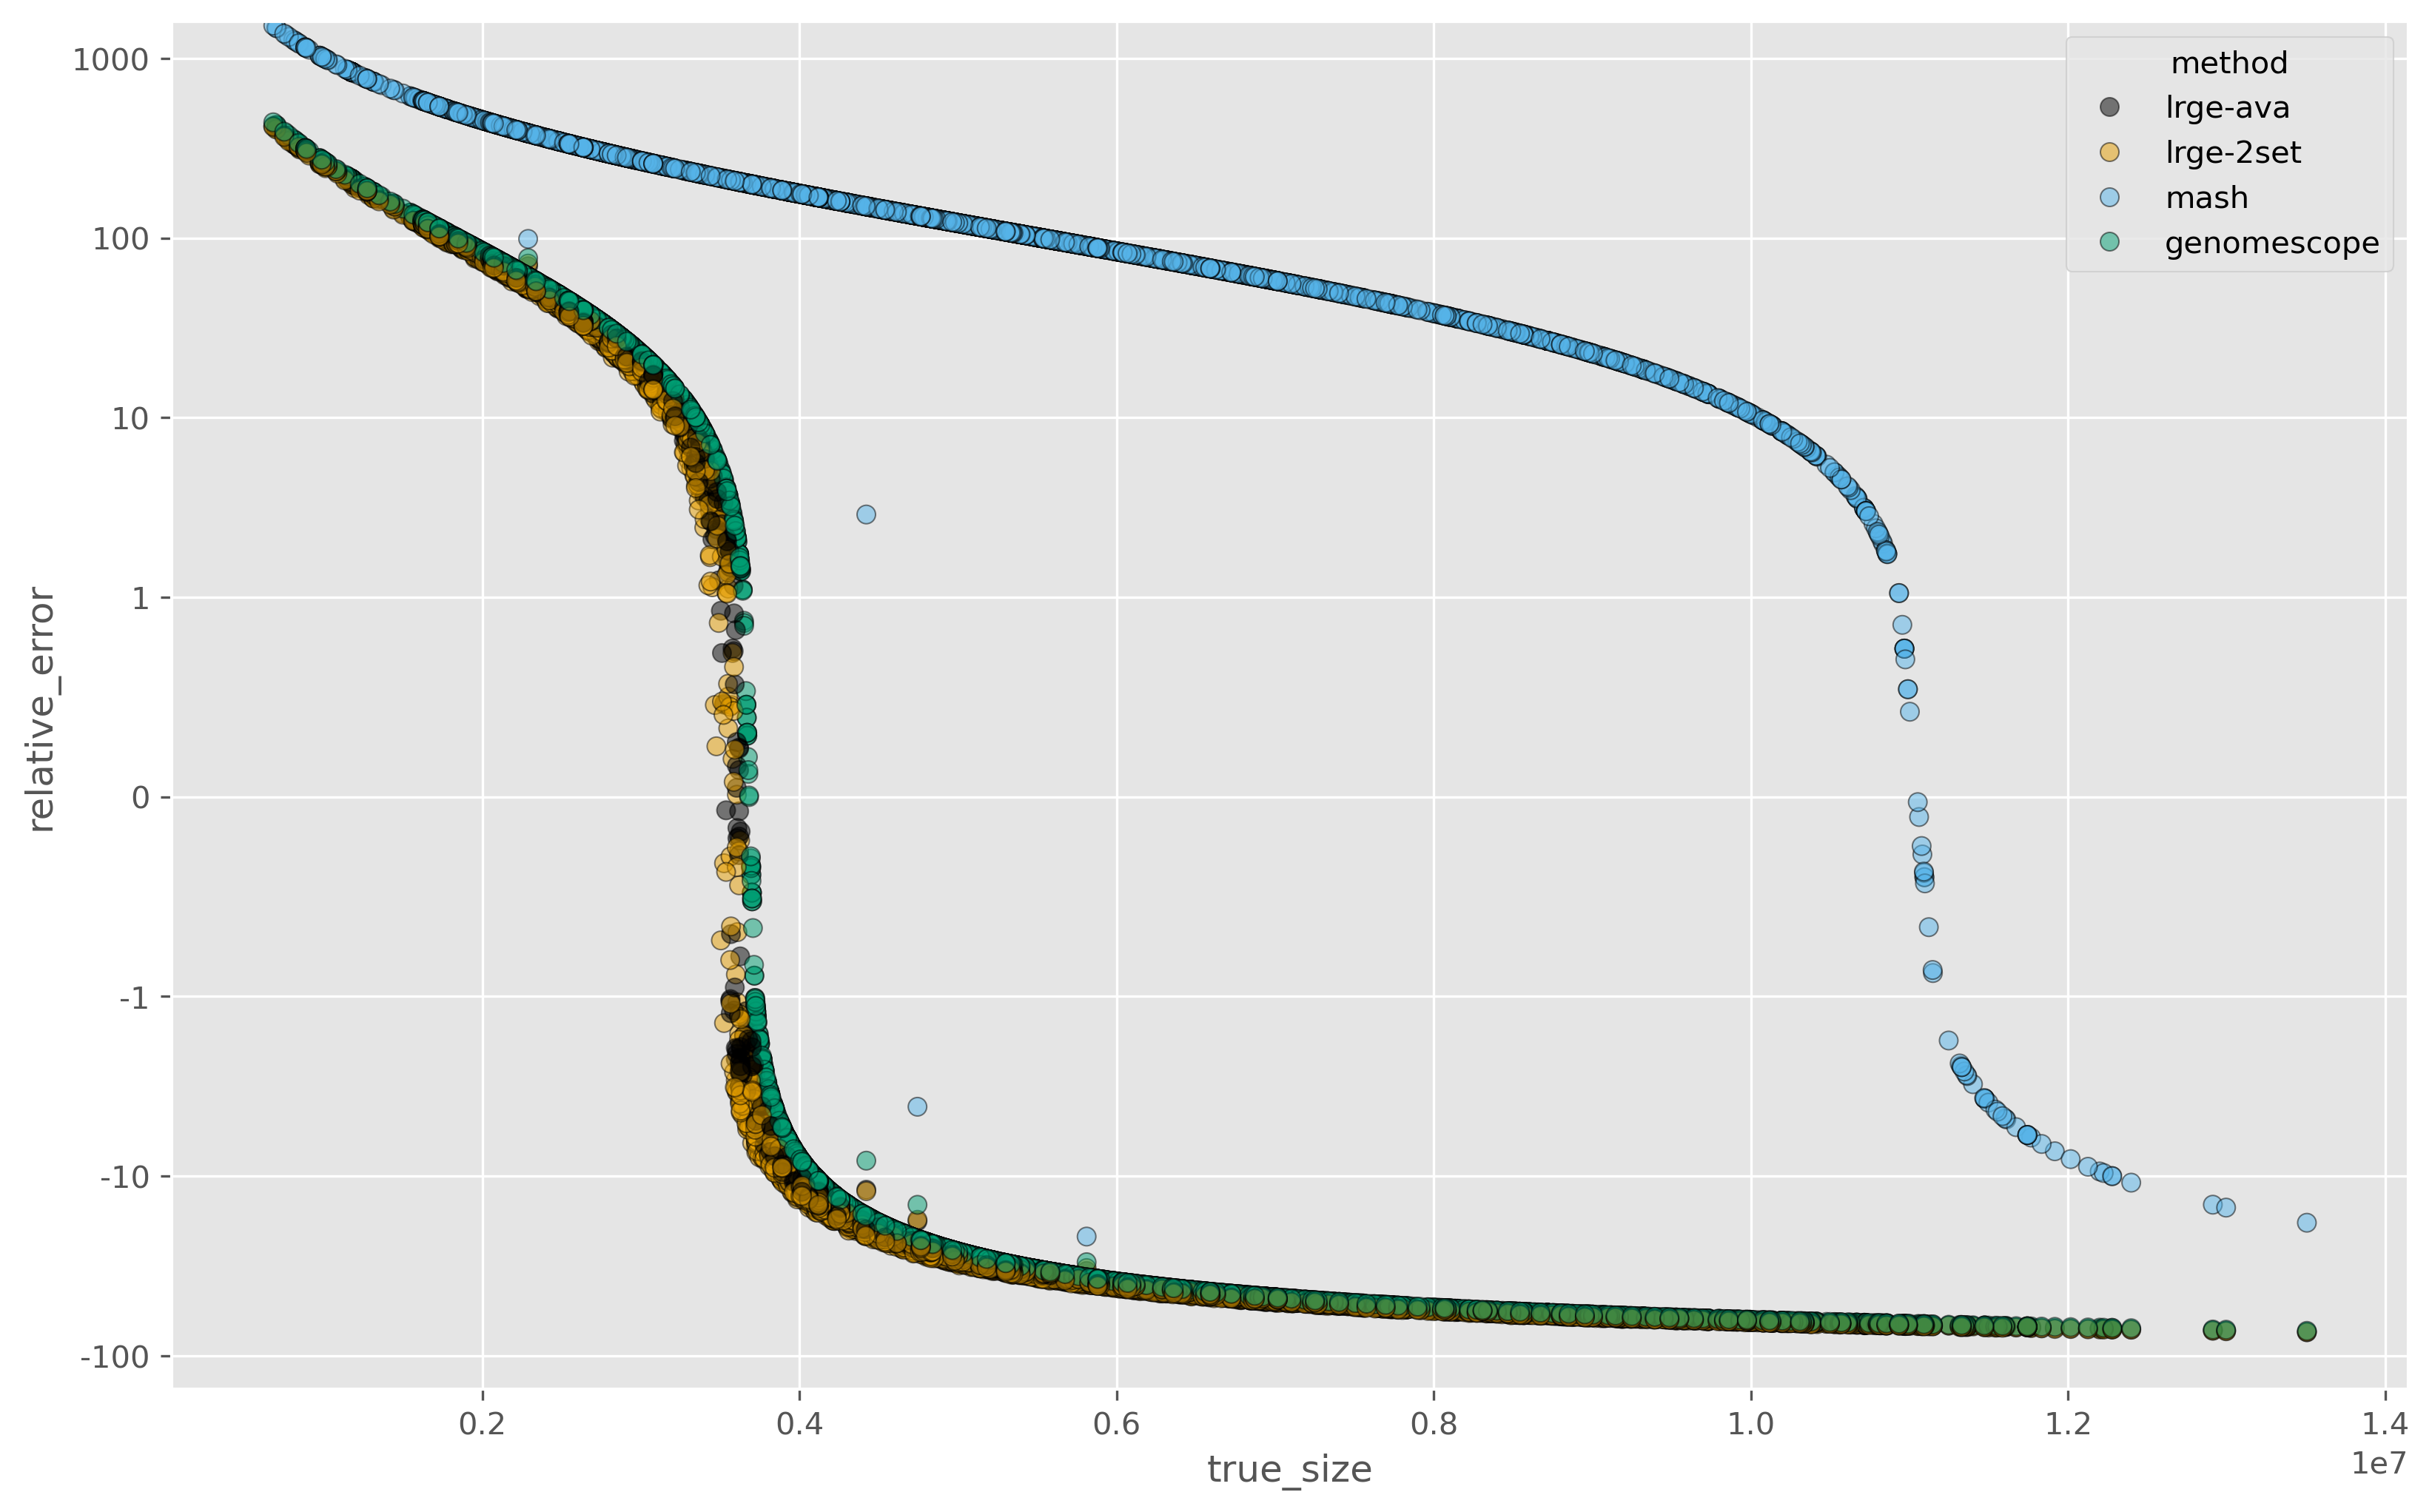

In [29]:
x = "true_size"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, edgecolor="black", alpha=0.5, palette=cud_palette)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

[Text(0, 0.01, '0.01'),
 Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000')]

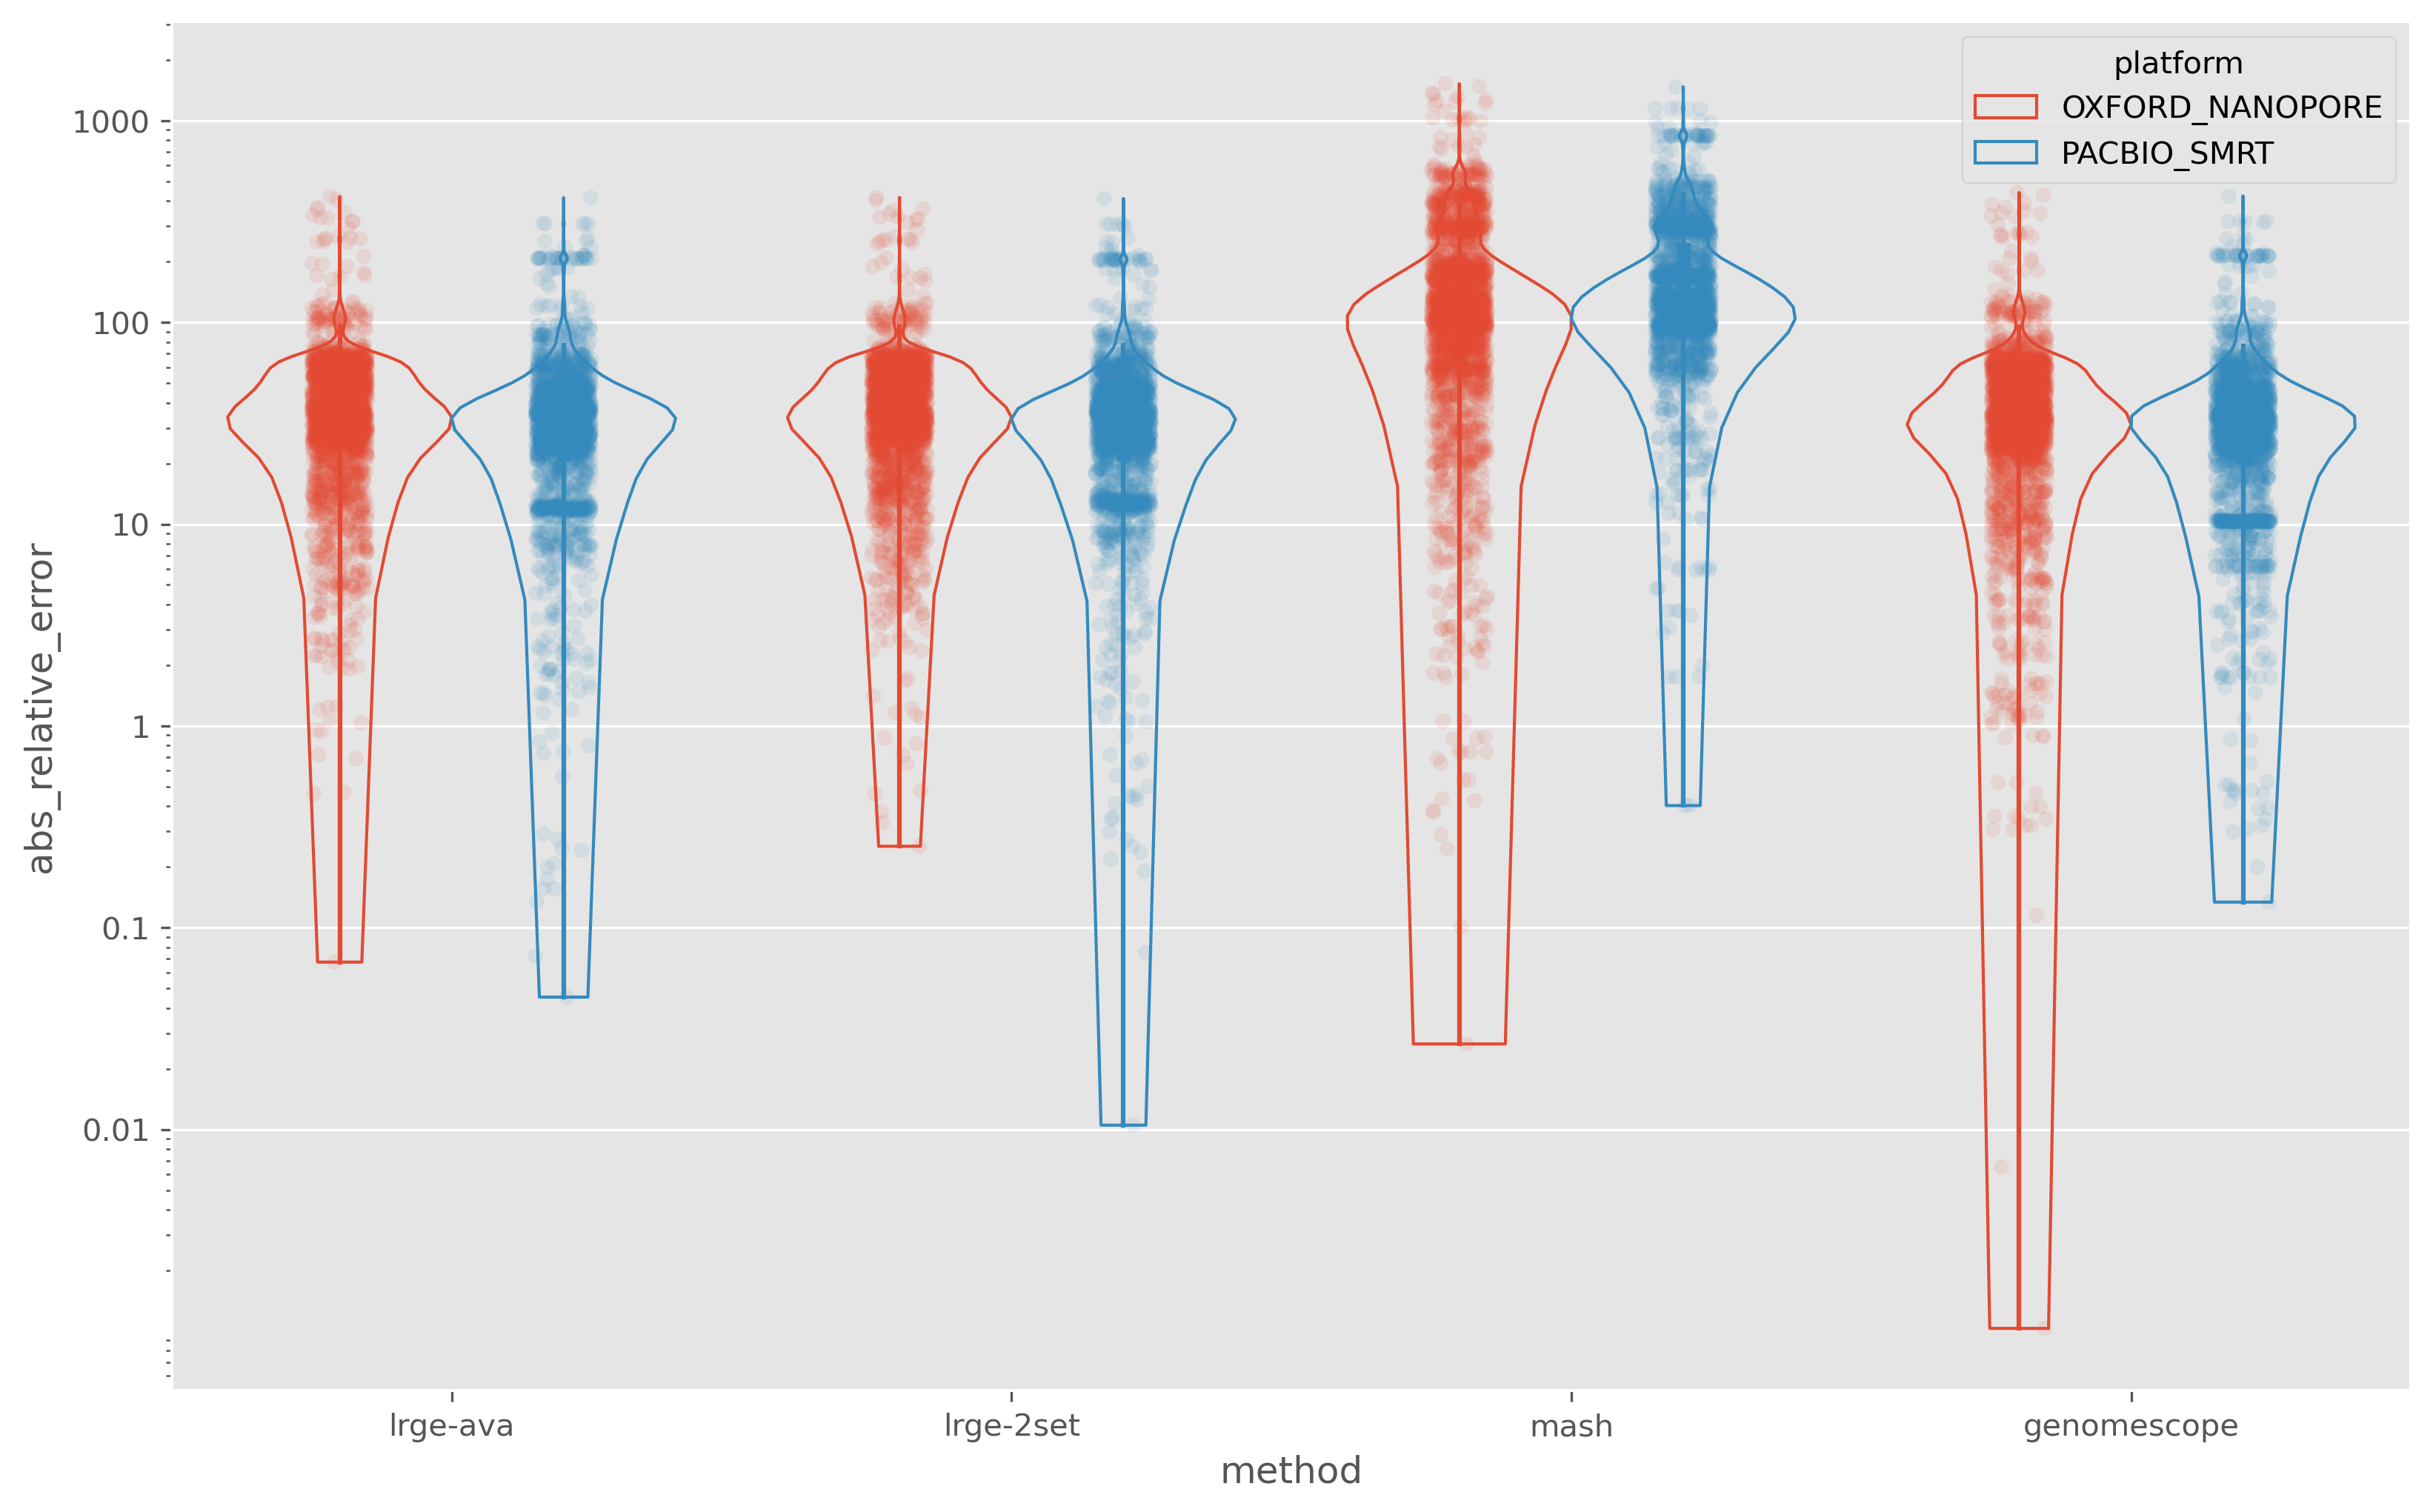

In [6]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = df
# sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
sns.violinplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1,
    cut=0,
    density_norm="width",
)
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.1, legend=False)
ax.set_yscale("log")
yticks = [0.01, 0.1, 1, 10, 100, 1000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
# sns.stripplot(x=x, y=y, hue=hue, data=data.query("`CheckM contamination`>2"), ax=ax, dodge=True, alpha=0.5, color="black", legend=False)

In [7]:
df.groupby(["method", "platform"])["abs_relative_error"].describe()

count        mean         std       min  \
method      platform                                                    
genomescope OXFORD_NANOPORE  2593.0   41.450704   35.328010  0.001032   
            PACBIO_SMRT      2219.0   37.936844   36.011575  0.133839   
lrge-2set   OXFORD_NANOPORE  2593.0   42.168268   32.483539  0.253132   
            PACBIO_SMRT      2219.0   38.112798   34.240640  0.010498   
lrge-ava    OXFORD_NANOPORE  2593.0   42.005549   32.936673  0.067488   
            PACBIO_SMRT      2219.0   38.047603   34.771204  0.045257   
mash        OXFORD_NANOPORE  2593.0  161.499261  158.729215  0.026512   
            PACBIO_SMRT      2219.0  185.022516  156.196536  0.402761   

                                   25%         50%         75%          max  
method      platform                                                         
genomescope OXFORD_NANOPORE  24.450451   35.112803   52.991411   440.339373  
            PACBIO_SMRT      21.541579   33.059774   43.615389   422.583585  
lrge-2set   OXFORD_NANOPORE  26.126659   37.110459   54.044696   415.673016  
            PACBIO_SMRT      22.328100   33.510809   44.342429   410.640928  
lrge-ava    OXFORD_NANOPORE  25.937767   36.643699   54.170490   419.621383  
            PACBIO_SMRT      22.144281   33.485373   44.184030   414.433271  
mash        OXFORD_NANOPORE  67.210642  115.553948  192.149009  1521.503022  
            PACBIO_SMRT      96.260978  130.502476  230.009466  1468.219723

In [8]:
import scipy.stats as stats

((array([-3.96950704, -3.75287213, -3.63431055, ...,  3.63431055,
          3.75287213,  3.96950704]),
  array([1.03211227e-03, 6.51909606e-03, 1.04976417e-02, ...,
         1.46821972e+03, 1.47805280e+03, 1.52150302e+03])),
 (np.float64(76.36316543472893),
  np.float64(73.16389837891128),
  np.float64(0.7486339380491589)))

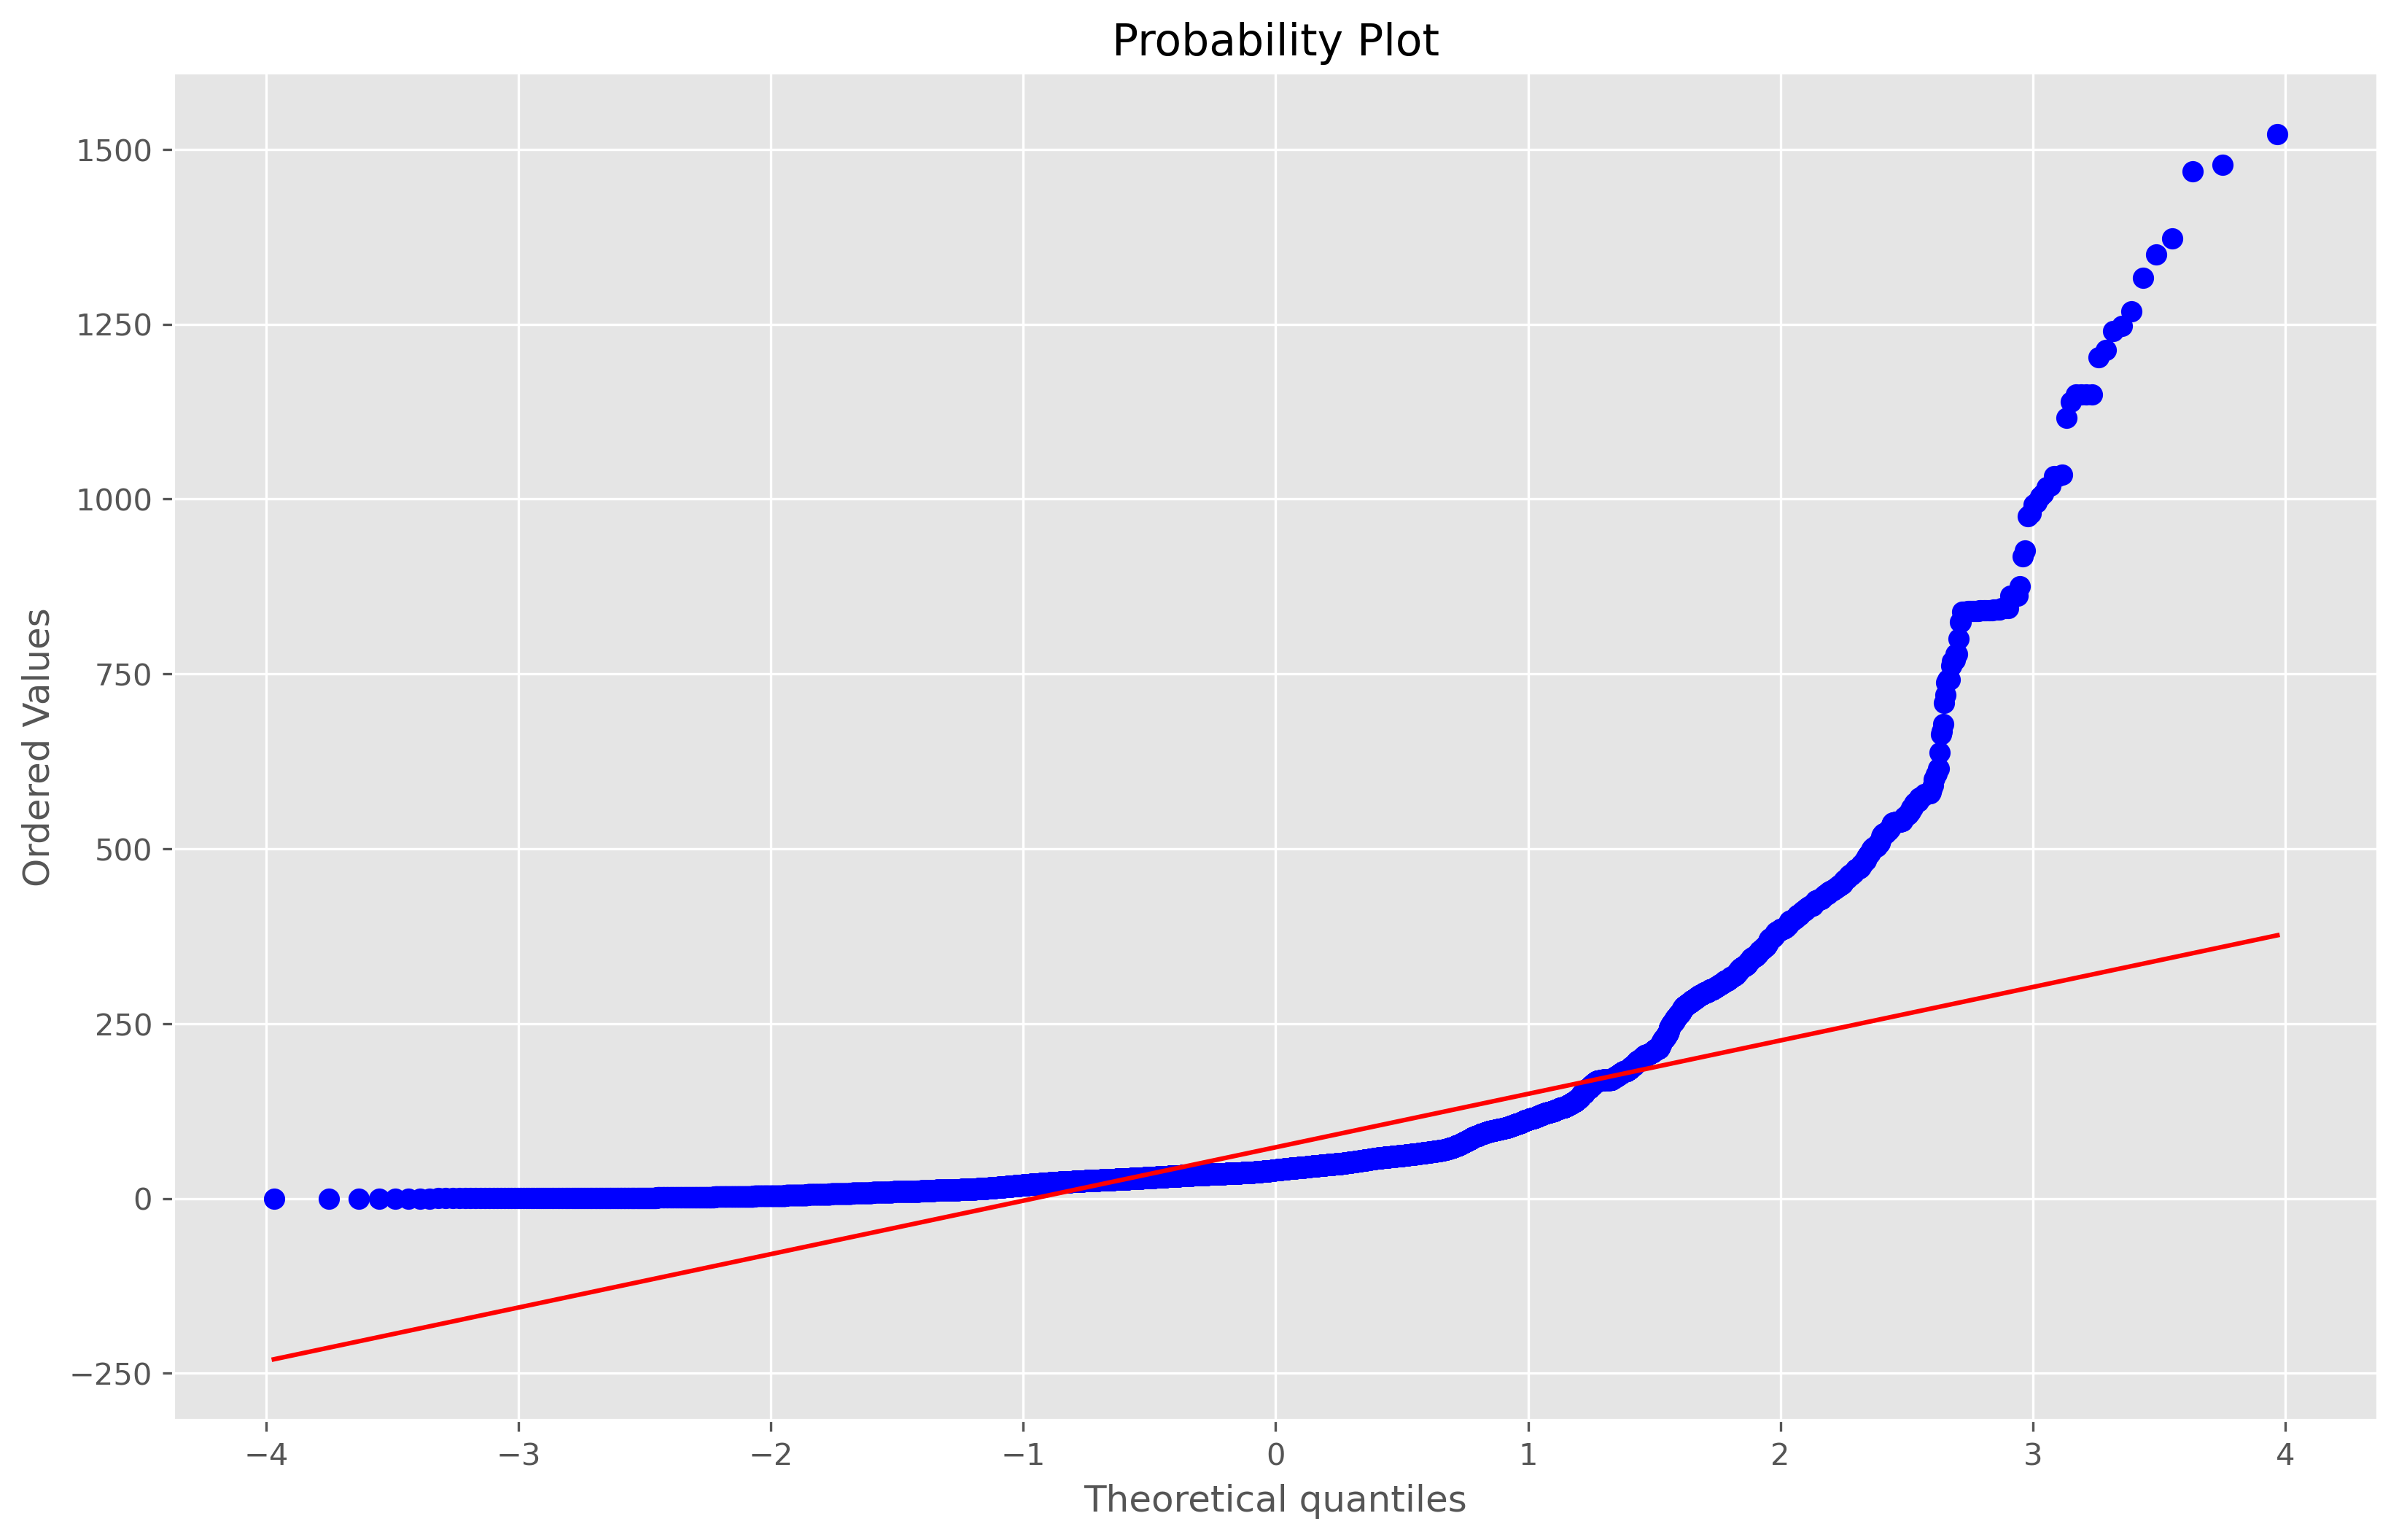

In [9]:
fig, ax = plt.subplots(dpi=300)
stats.probplot(df["abs_relative_error"], dist="norm", plot=ax)

In [10]:
from scipy.stats import shapiro, kruskal

In [11]:
# Shapiro-Wilk Test
stat, p_value = shapiro(df["abs_relative_error"])
print(f'Shapiro-Wilk test: p-value = {p_value}')
if p_value < 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

Shapiro-Wilk test: p-value = 9.319995749705653e-112
The data is not normally distributed


/home/mihall/sw/miniforge3/envs/gsize/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19248.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
grouped = df.query("platform == 'PACBIO_SMRT'").groupby("method")["abs_relative_error"].apply(list)
stat, p_value = kruskal(*grouped)
# Output the test statistic and p-value
print(f"Kruskal-Wallis test statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the groups for PacBio.")
    # show the differences
    for a, b in itertools.combinations(grouped.keys(), 2):
        stat, p_value = stats.mannwhitneyu(grouped[a], grouped[b])
        print(f"{a} vs {b}: p-value = {p_value:.4f}")
else:
    print("There is no significant difference between the groups.")

Kruskal-Wallis test statistic = 3795.2790, p-value = 0.0000
There is a significant difference between the groups for PacBio.
genomescope vs lrge-2set: p-value = 0.0647
genomescope vs lrge-ava: p-value = 0.1634
genomescope vs mash: p-value = 0.0000
lrge-2set vs lrge-ava: p-value = 0.4508
lrge-2set vs mash: p-value = 0.0000
lrge-ava vs mash: p-value = 0.0000


In [15]:
grouped = df.query("platform == 'OXFORD_NANOPORE'").groupby("method")["abs_relative_error"].apply(list)
stat, p_value = kruskal(*grouped)
# Output the test statistic and p-value
print(f"Kruskal-Wallis test statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the groups for ONT.")
    # show the differences
    for a, b in itertools.combinations(grouped.keys(), 2):
        stat, p_value = stats.mannwhitneyu(grouped[a], grouped[b])
        print(f"{a} vs {b}: p-value = {p_value:.4f}")
else:
    print("There is no significant difference between the groups.")

Kruskal-Wallis test statistic = 2733.6456, p-value = 0.0000
There is a significant difference between the groups for ONT.
genomescope vs lrge-2set: p-value = 0.0069
genomescope vs lrge-ava: p-value = 0.0288
genomescope vs mash: p-value = 0.0000
lrge-2set vs lrge-ava: p-value = 0.5718
lrge-2set vs mash: p-value = 0.0000
lrge-ava vs mash: p-value = 0.0000


/tmp/ipykernel_234242/2041084529.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(
/tmp/ipykernel_234242/2041084529.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.stripplot(


Text(0.5, 0, 'CPU time')

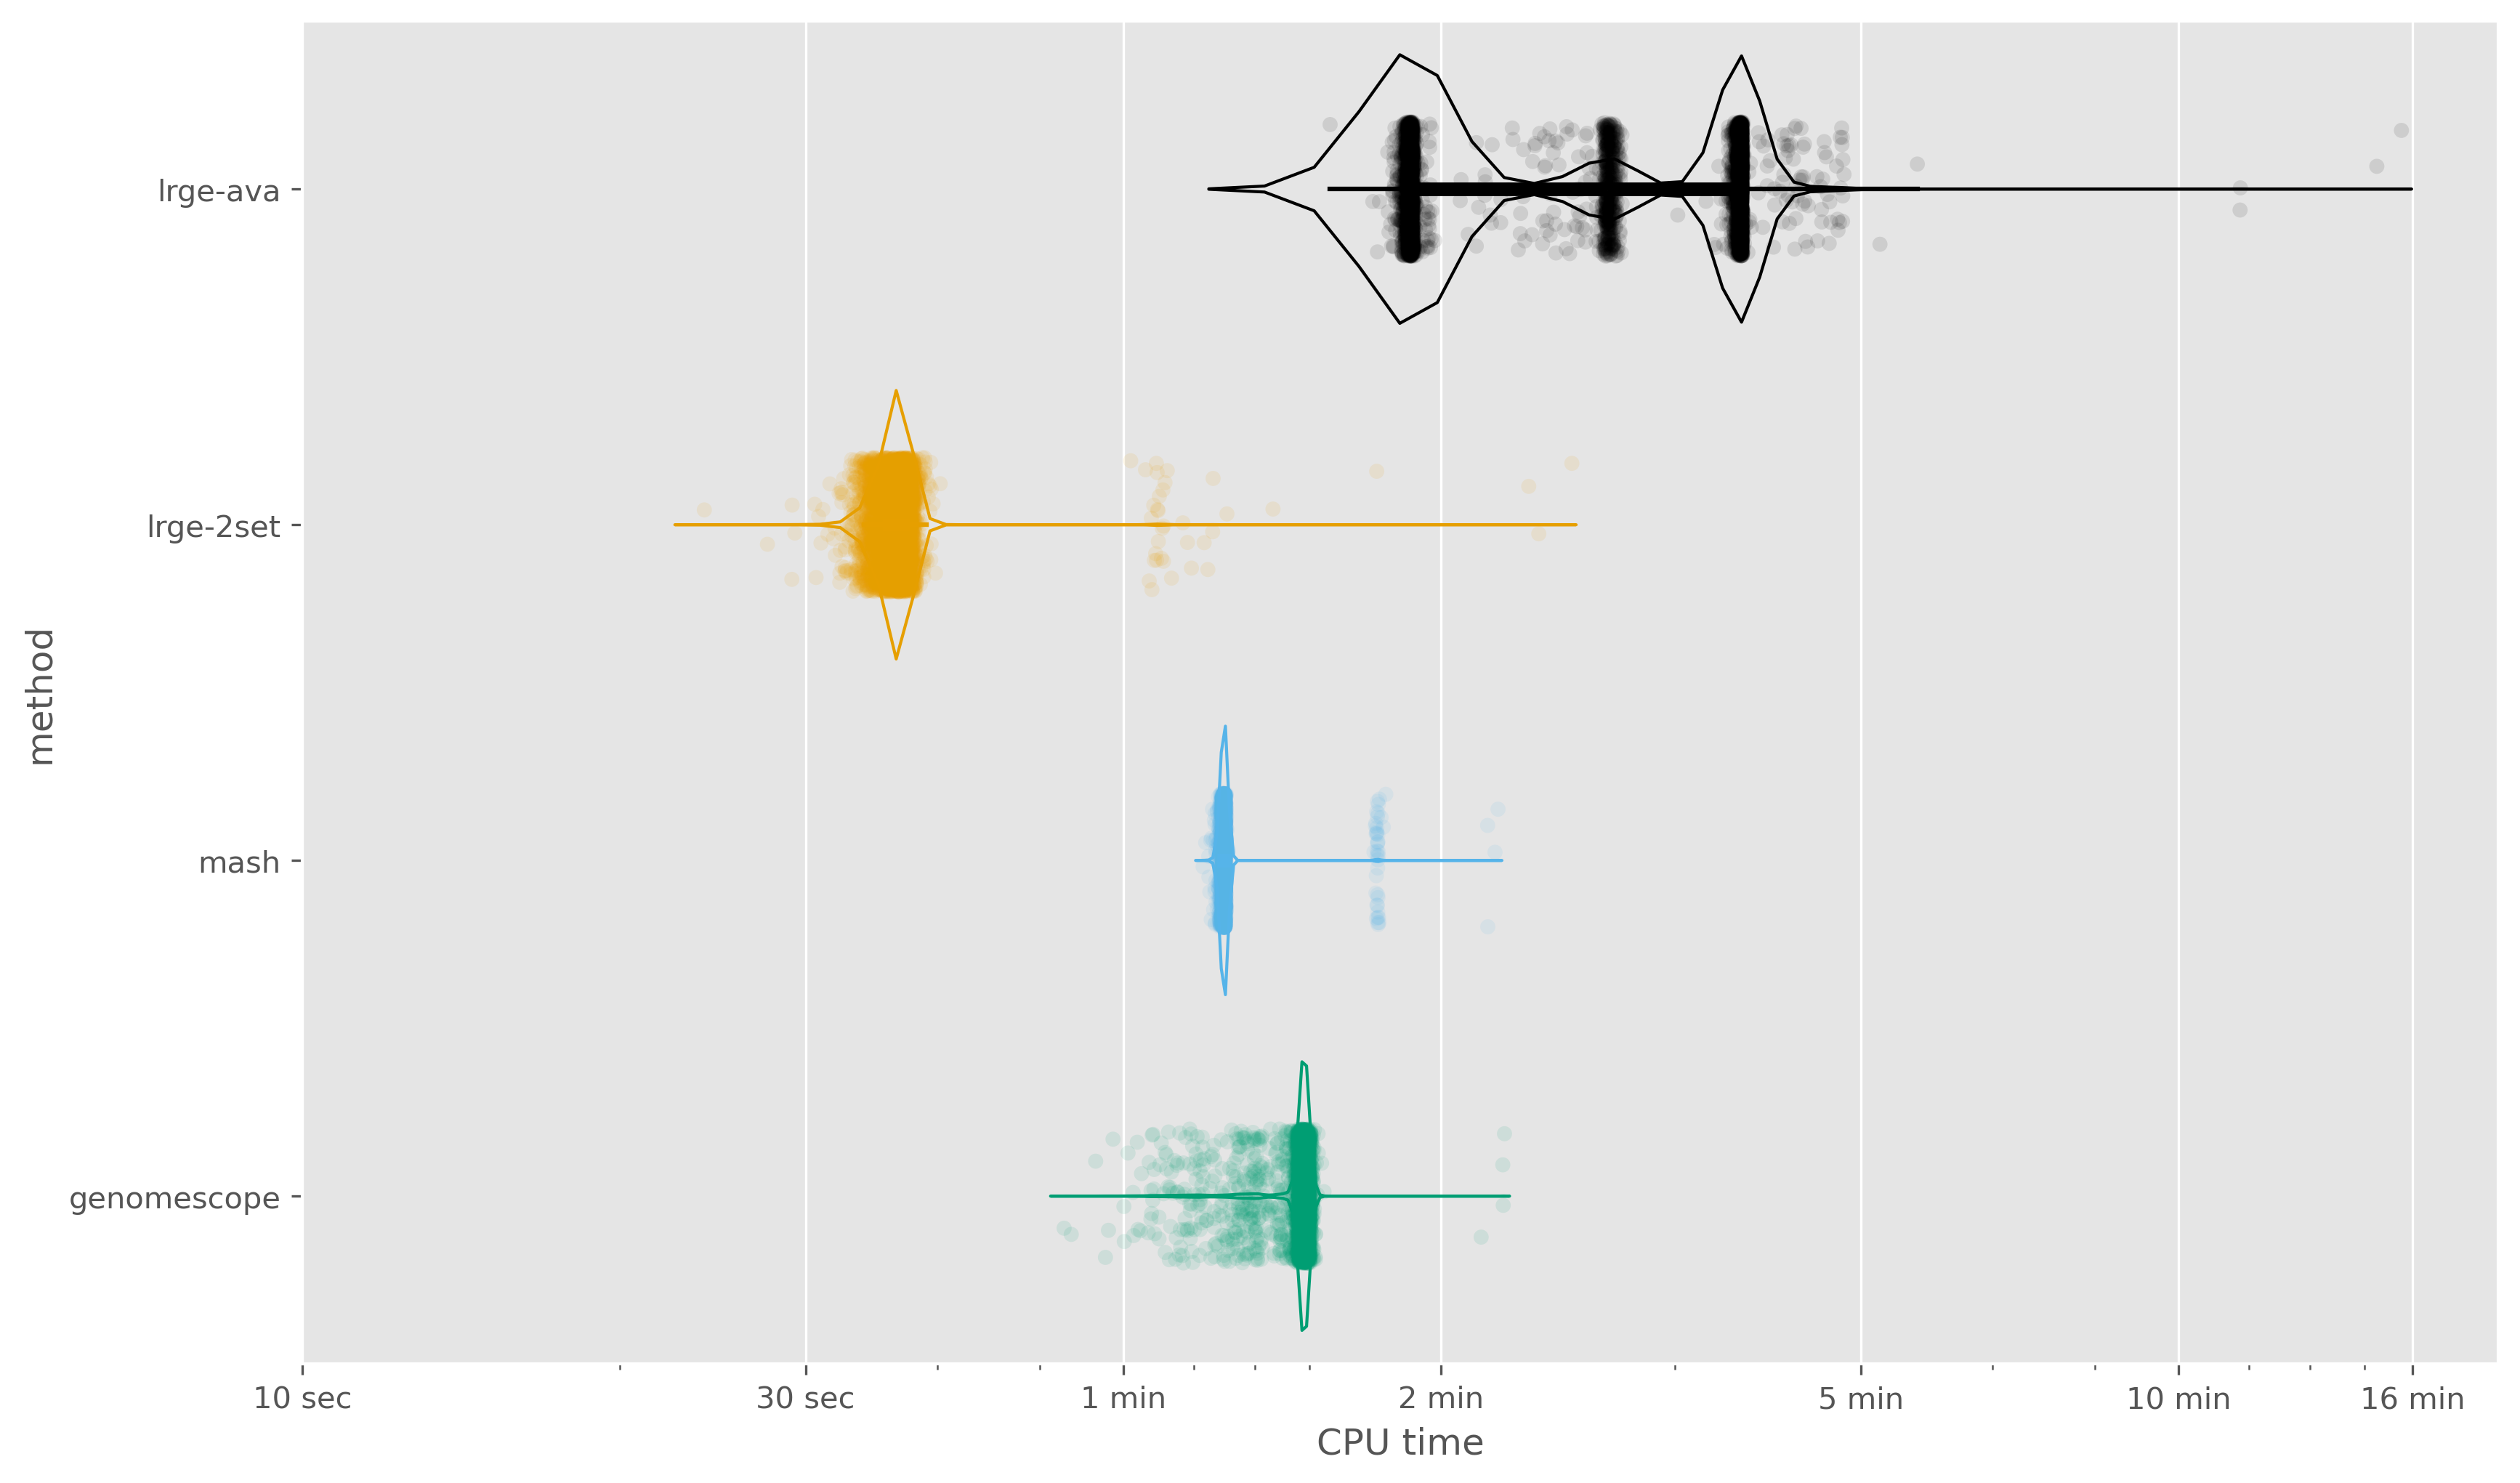

In [40]:
fig, ax = plt.subplots(dpi=300)
x = "cpu_time"
y = "method"
data = df
sns.violinplot(
    x=x,
    y=y,
    hue=y,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1,
    density_norm="width",
    palette=cud_palette,
)
sns.stripplot(
    x=x,
    y=y,
    hue=y,
    data=data,
    ax=ax,
    alpha=0.1,
    palette=cud_palette,
    jitter=0.2,
    legend=False,
)
ax.set_xscale("log")
xticks = [10, 30, 60, 120, 300, 600, 1000]
ax.set_xticks(xticks)
# convert seconds to best units
ax.set_xticklabels([f"{int(x/60)} min" if x >= 60 else f"{x} sec" for x in xticks])

ax.set_xlabel("CPU time")

/tmp/ipykernel_234242/336865937.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(
/tmp/ipykernel_234242/336865937.py:17: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.stripplot(


Text(0.5, 0, 'Memory')

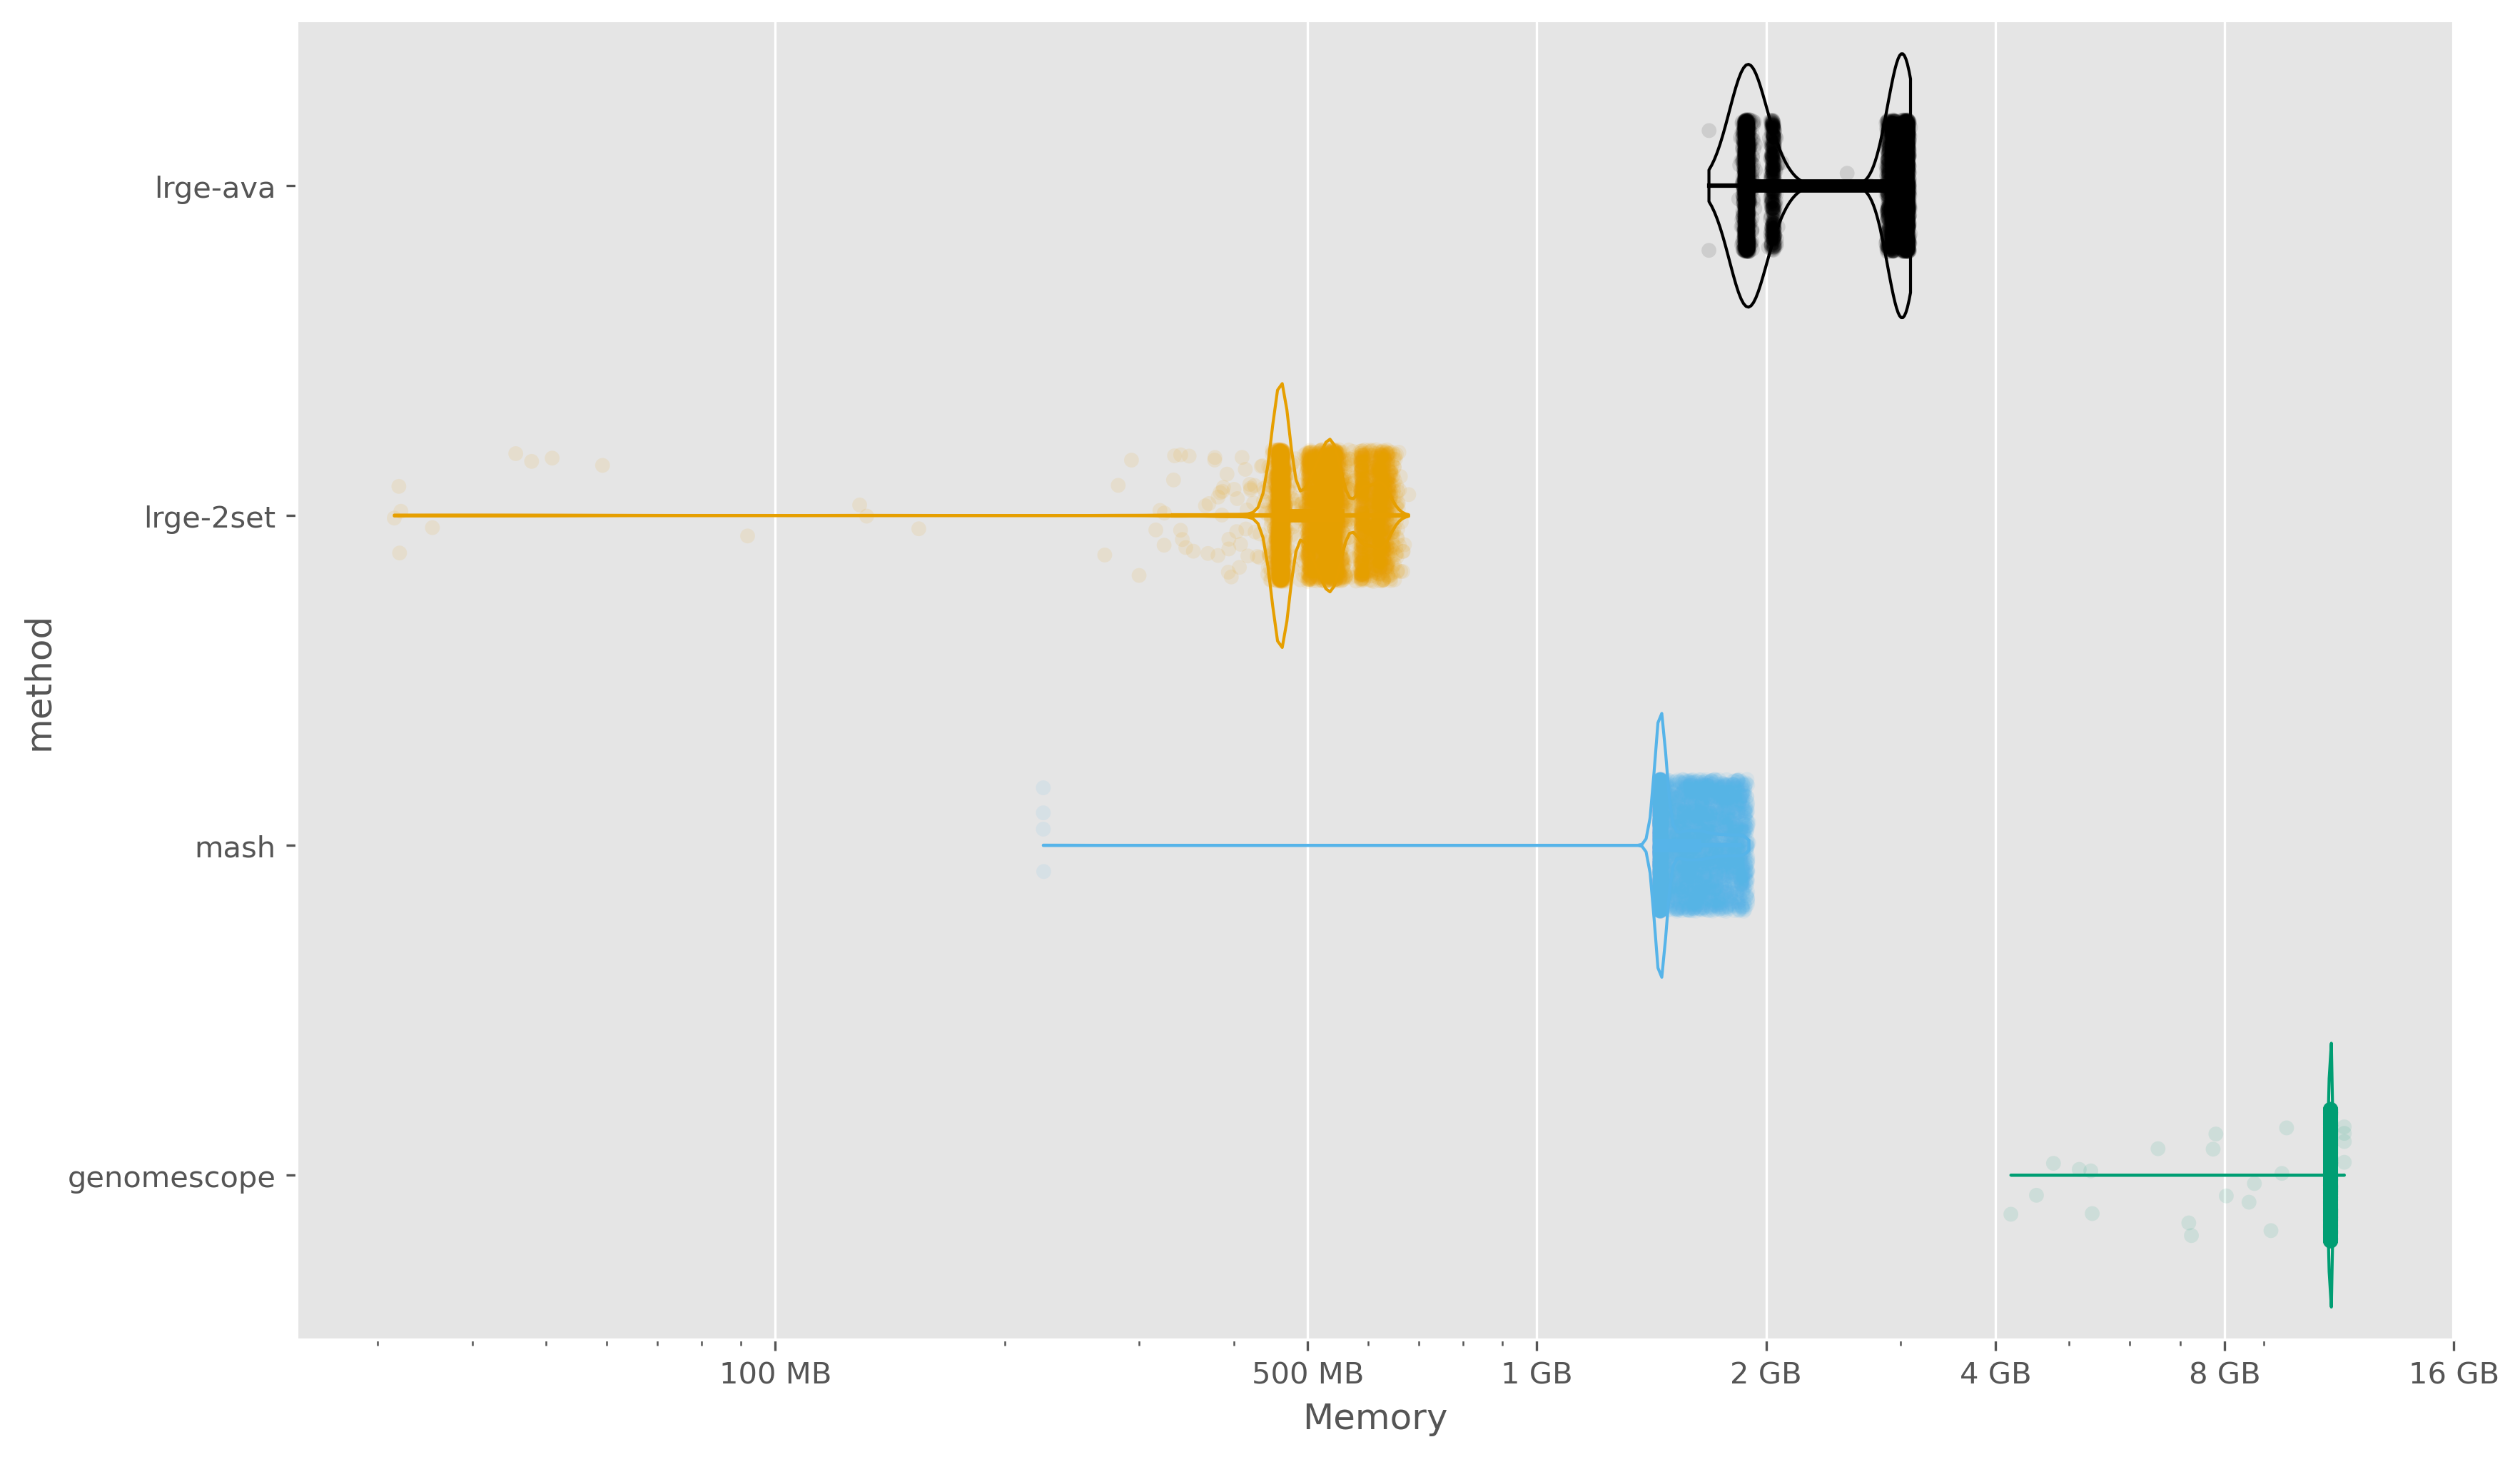

In [54]:
fig, ax = plt.subplots(dpi=300)
x = "memory_mb"
y = "method"
data = df
sns.violinplot(
    x=x,
    y=y,
    hue=y,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1,
    density_norm="width",
    palette=cud_palette,
    cut=0,
)
sns.stripplot(
    x=x,
    y=y,
    hue=y,
    data=data,
    ax=ax,
    alpha=0.1,
    palette=cud_palette,
    jitter=0.2,
    legend=False,
    edgecolor="black",
)
ax.set_xscale("log")
xticks = [100, 500, 1_000, 2_000, 4_000, 8_000, 16_000]
xticklabels = [f"{x} MB" if x < 1_000 else f"{x/1_000:.0f} GB" for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel("Memory")

[Text(0.1, 0, '0.1'),
 Text(1.0, 0, '1'),
 Text(10.0, 0, '10'),
 Text(100.0, 0, '100'),
 Text(1000.0, 0, '1000')]

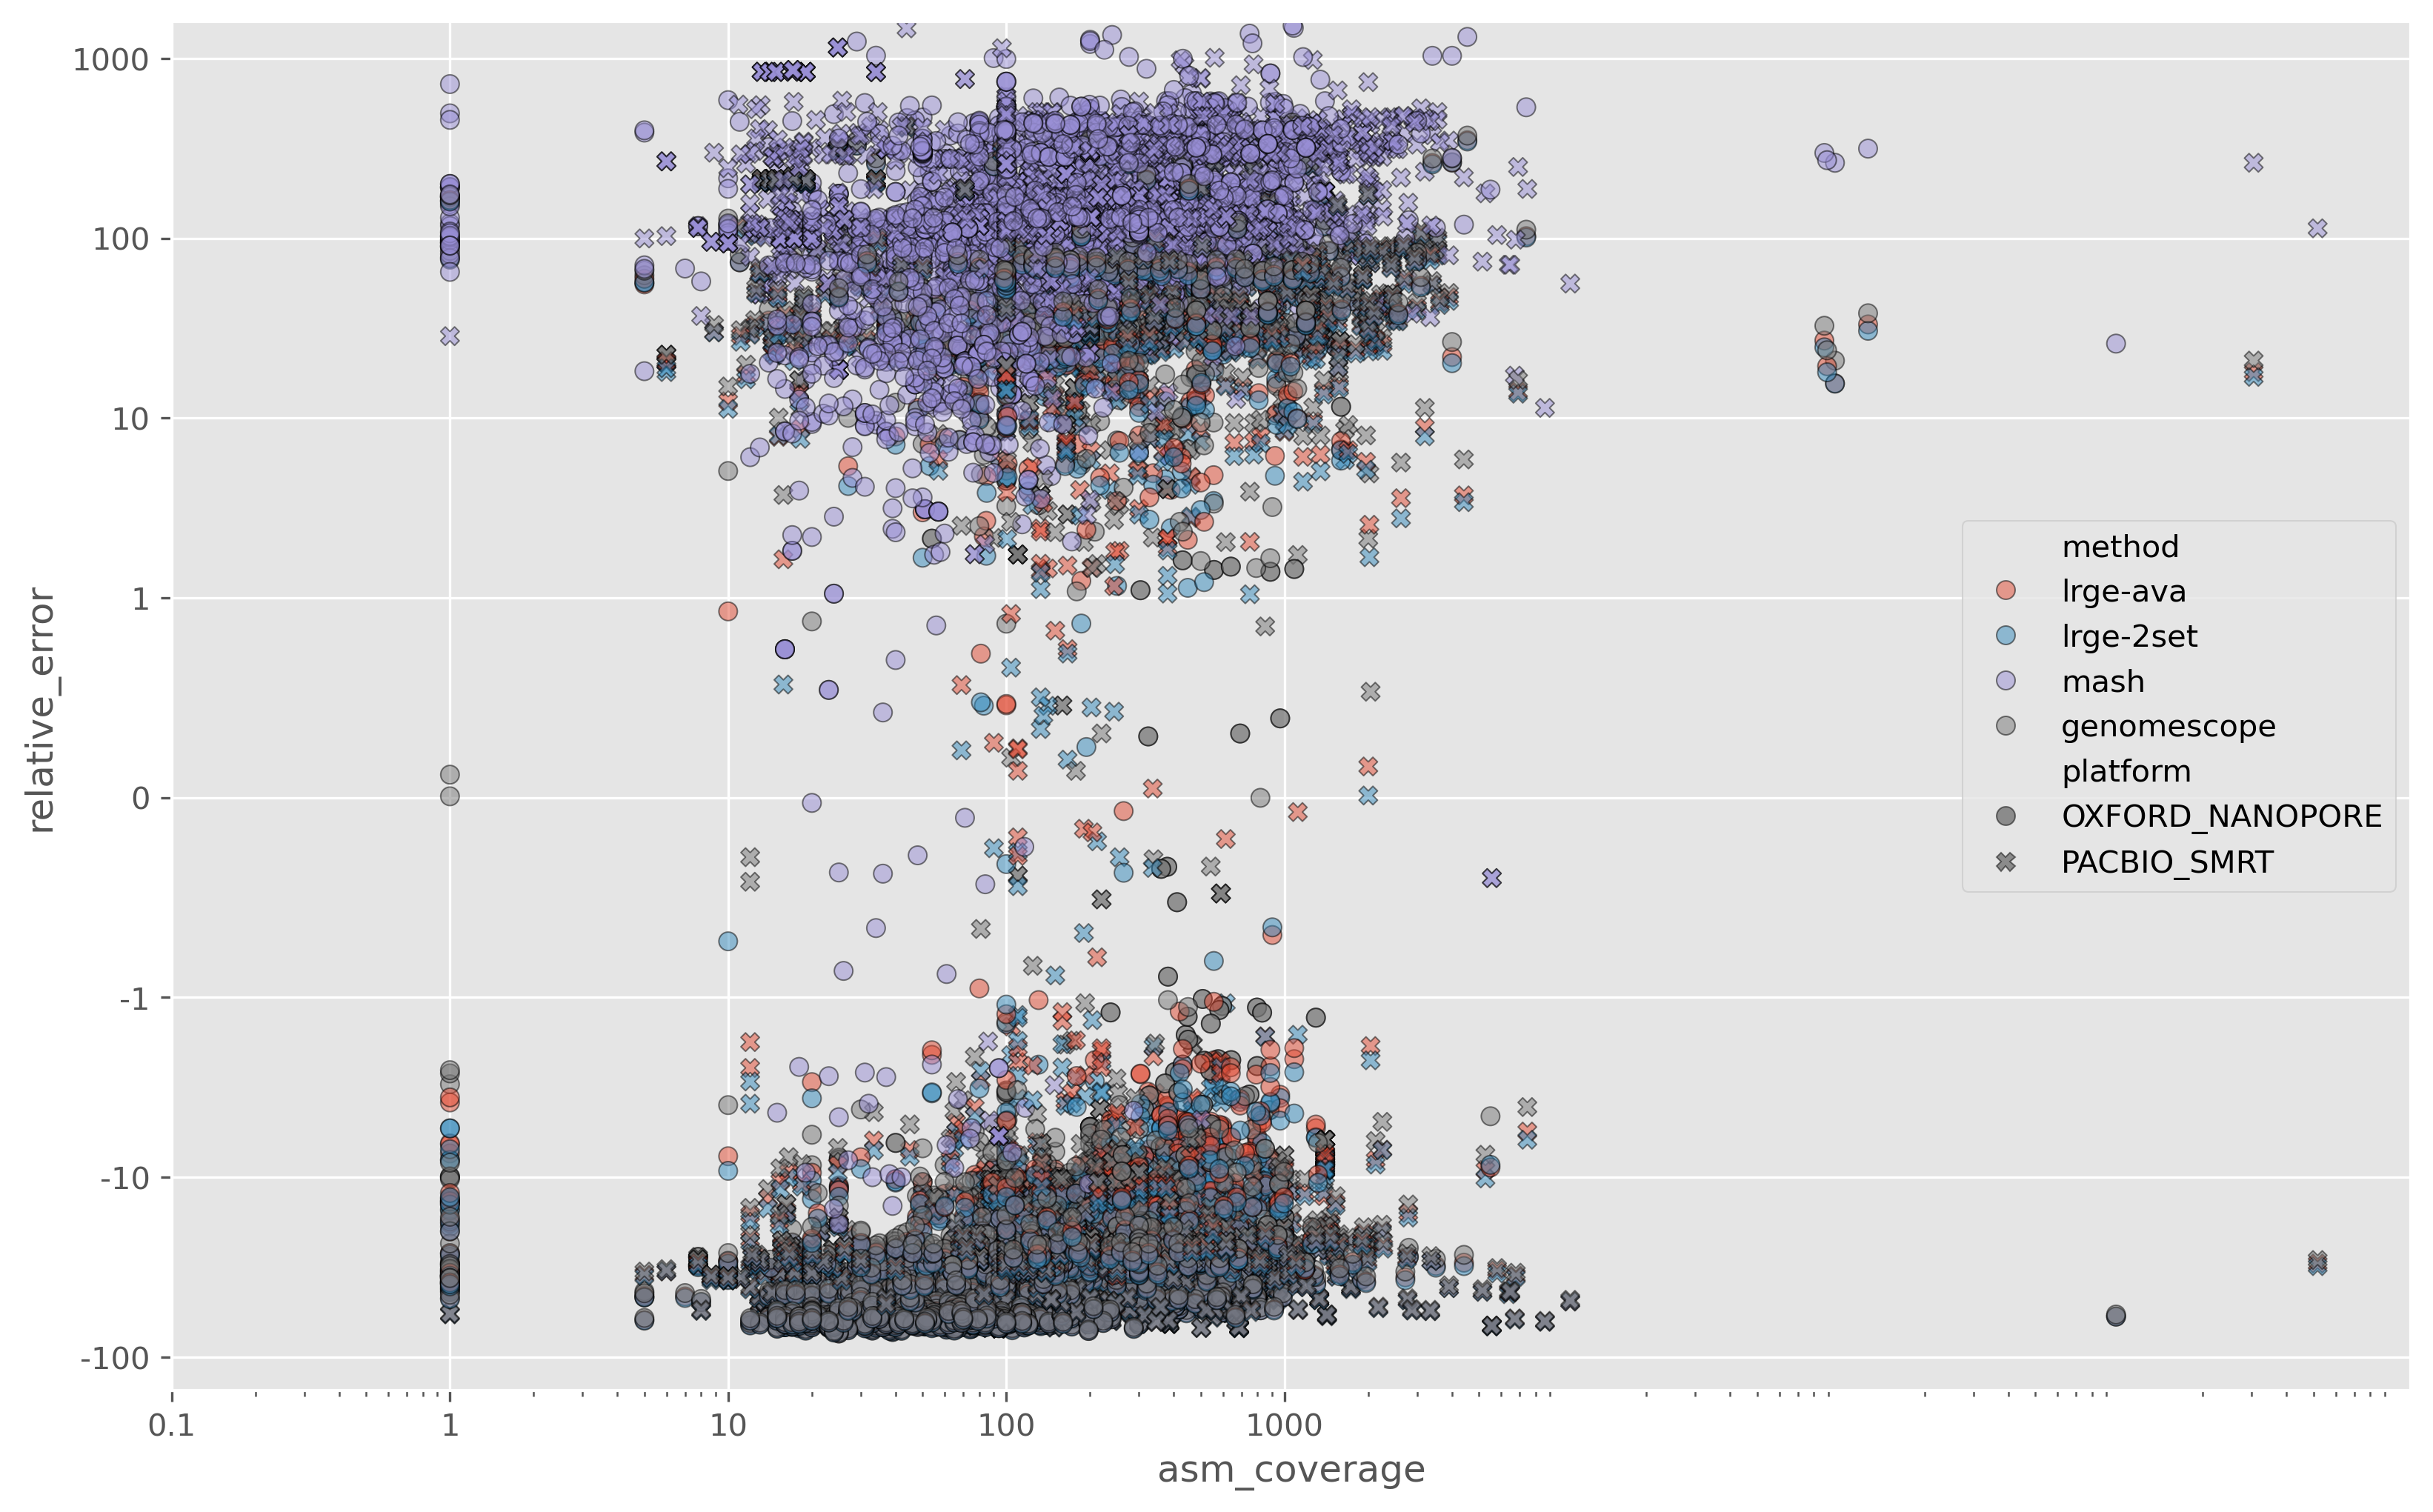

In [20]:
x = "asm_coverage"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, style=style, data=data, ax=ax, edgecolor="black", alpha=0.5)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xscale("log")
xticks = [0.1, 1, 10, 100, 1000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

<Axes: xlabel='asm_coverage', ylabel='Count'>

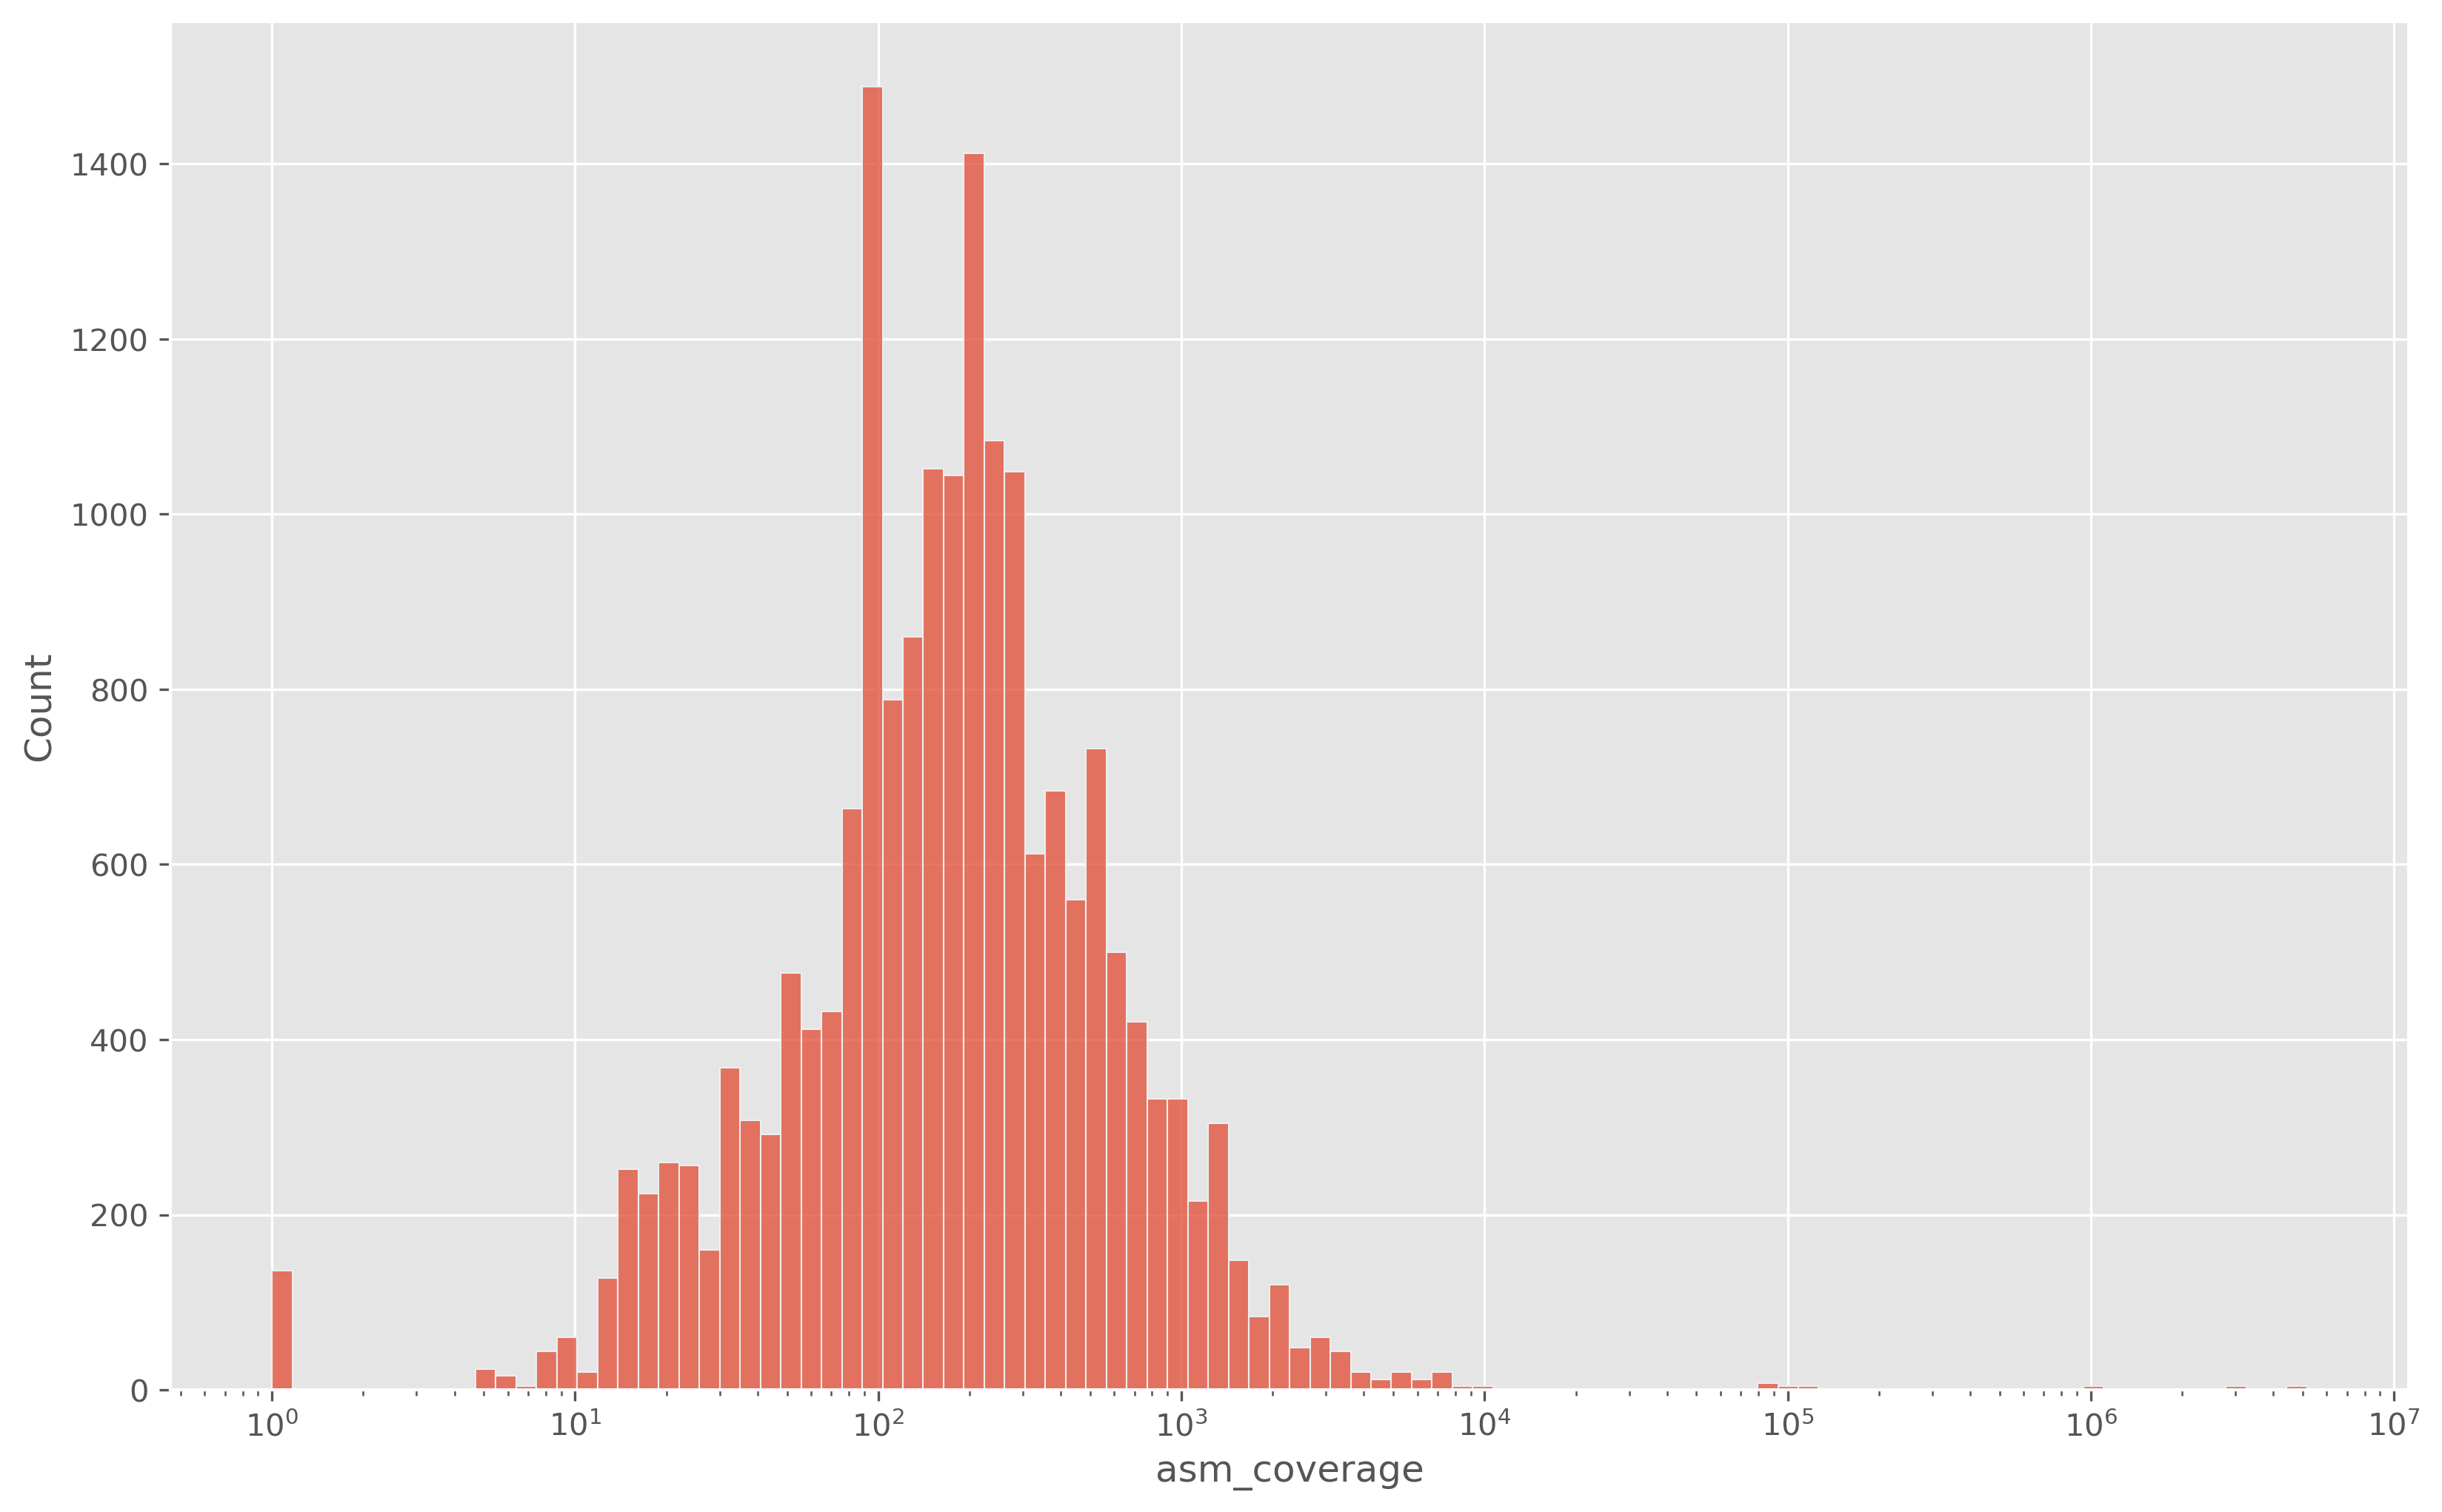

In [21]:
sns.histplot(data=df, x="asm_coverage", bins=100, log_scale=True)

In [56]:
df.query("abs_relative_error > 1000")

asm_accession                                organism    taxid  \
4318   GCF_026821955.1             Candidatus Phytoplasma rubi   399025   
4322   GCF_040126175.1           Candidatus Phytoplasma solani    69896   
4326   GCF_041729675.1           Candidatus Phytoplasma solani    69896   
4330   GCF_041729685.1           Candidatus Phytoplasma solani    69896   
9942   GCF_038095665.1            Mesomycoplasma ovipneumoniae    29562   
9950   GCF_002749675.1                 Mesoplasma entomophilum     2149   
9954   GCF_002504365.1                       Mesoplasma florum     2151   
9958   GCF_002504385.1                       Mesoplasma florum     2151   
9962   GCF_002843565.1                    Mesoplasma syrphidae   225999   
10058  GCF_013367855.1                  Metamycoplasma hominis     2098   
10062  GCF_013367955.1                  Metamycoplasma hominis     2098   
10066  GCF_013367995.1                  Metamycoplasma hominis     2098   
10070  GCF_013368015.1                  Metamycoplasma hominis     2098   
10642  GCF_004771095.1            Mycoplasmoides gallisepticum     2096   
10646  GCF_004771115.1            Mycoplasmoides gallisepticum     2096   
10658  GCF_021497085.1                    Mycoplasmopsis bovis    28903   
10670  GCF_034648455.1                    Mycoplasmopsis cynos   171284   
10678  GCF_009936335.1                    Mycoplasmopsis felis    33923   
10682  GCF_034647695.2                    Mycoplasmopsis felis    33923   
10926  GCF_000632985.1  Neorickettsia helminthoeca str. Oregon  1286528   
10930  GCF_000632985.1  Neorickettsia helminthoeca str. Oregon  1286528   
10934  GCF_000632985.1  Neorickettsia helminthoeca str. Oregon  1286528   
10938  GCF_000632985.1  Neorickettsia helminthoeca str. Oregon  1286528   
12214  GCF_019396865.1    Paulownia witches'-broom phytoplasma    39647   

         bioproject     biosample              strain        asm_seq_tech  \
4318    PRJNA906321  SAMN31868164                  RS        Illumina;ONT   
4322   PRJNA1107139  SAMN40861605                 GOE              PacBio   
4326    PRJNA830658  SAMN27736172                  o3        Illumina;ONT   
4330    PRJNA830658  SAMN27736171                  c5        Illumina;ONT   
9942   PRJNA1070810  SAMN39783613           OARF1_080        Illumina;ONT   
9950    PRJNA415956  SAMN07838951                 TAC        Illumina;ONT   
9954    PRJNA412852  SAMN07735426                 GF1        Illumina;ONT   
9958    PRJNA412852  SAMN07735427                PPA1        Illumina;ONT   
9962    PRJNA421837  SAMN08158127                 YJS  Illumina;Other;ONT   
10058   PRJNA429440  SAMN15042587                 FBG                 ONT   
10062   PRJNA429440  SAMN15042592                SS10                 ONT   
10066   PRJNA429440  SAMN15042594             VO31120                 ONT   
10070   PRJNA429440  SAMN15042595             SP10291                 ONT   
10642   PRJNA445284  SAMN08774605  f99 Avipro vaccine        Illumina;ONT   
10646   PRJNA445284  SAMN08774113      f99 lab strain        Illumina;ONT   
10658   PRJNA407761  SAMN07662835                KRB1     Illumina;PacBio   
10670  PRJNA1018939  SAMN37528863               64228        Illumina;ONT   
10678     PRJDB9149  SAMD00199257              Myco-2           Other;ONT   
10682  PRJNA1018939  SAMN37528868               40612        Illumina;ONT   
10926   PRJNA187358  SAMN02367297              Oregon              PacBio   
10930   PRJNA187358  SAMN02367297              Oregon              PacBio   
10934   PRJNA187358  SAMN02367297              Oregon              PacBio   
10938   PRJNA187358  SAMN02367297              Oregon              PacBio   
12214   PRJNA624276  SAMN14573116           Zhengzhou              PacBio   

       n_chromosomes  true_size  asm_coverage  ... checkm_contamination  \
4318               1     762251         240.0  ...                 1.16   
4322               1     704525          43.8  ...       

: 

Looking at CheckM stats for all the assemblies

In [79]:
asm = pd.read_csv("../config/bacteria.tsv", sep="\t")

In [80]:
asm

Assembly Accession                                      Organism Name  \
0        GCF_004214875.1    'Catharanthus roseus' aster yellows phytoplasma   
1        GCF_000196515.1                              'Nostoc azollae' 0708   
2        GCF_000022305.1                           [Acidovorax] ebreus TPSY   
3        GCF_002057455.1            [Actinomadura] parvosata subsp. kistnae   
4        GCF_001542565.1                      [Arthrobacter] sp. ATCC 21022   
...                  ...                                                ...   
43451    GCF_000576165.1  Zymomonas mobilis subsp. mobilis str. CP4 = NR...   
43452    GCF_000007105.1  Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821   
43453    GCF_003054575.1  Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821   
43454    GCF_004168305.2  Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821   
43455    GCF_000218875.1       Zymomonas mobilis subsp. pomaceae ATCC 29192   

       Organism Taxonomic ID Assembly BioProject Accession  \
0                    1193712                   PRJNA522055   
1                     551115                    PRJNA30807   
2                     535289                    PRJNA29975   
3                    1909395                   PRJNA348567   
4                    1771959                   PRJNA306041   
...                      ...                           ...   
43451                 627343                   PRJNA167436   
43452                 264203                    PRJNA12354   
43453                 264203                   PRJNA391970   
43454                 264203                   PRJNA521016   
43455                 579138                    PRJNA34927   

      Assembly BioSample Accession Assembly Name  CheckM completeness  \
0                     SAMN10923938   ASM421487v1                99.22   
1                     SAMN02598476    ASM19651v1                96.13   
2                     SAMN00001444     ASM2230v1               100.00   
3                     SAMN05912833   ASM205745v1                92.82   
4                     SAMN04338418   ASM154256v1                99.74   
...                            ...           ...                  ...   
43451                 SAMN03081440    ASM57616v1                97.67   
43452                 SAMN02603579      ASM710v1                96.91   
43453                 SAMN07274095   ASM305457v1                98.44   
43454                 SAMN10863893   ASM416830v2                98.41   
43455                 SAMN02232067    ASM21887v1                96.98   

       CheckM completeness percentile  CheckM contamination  
0                             100.000                   NaN  
1                             100.000                  0.30  
2                             100.000                  0.67  
3                             100.000                 15.00  
4                             100.000                  0.18  
...                               ...                   ...  
43451                          71.875                  1.17  
43452                          46.875                  2.39  
43453                         100.000                  3.51  
43454                          87.500                  3.51  
43455                          50.000                  1.82  

[43456 rows x 9 columns]